In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_16_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period       s1a      s1x     s1i  \
datetime                                                                       
2013-03-16 00:10:00  2013-03-16  00:10:00     600  11.36093  13.3025  9.0797   
2013-03-16 00:20:00  2013-03-16  00:20:00     600  11.66387  13.5320  9.6305   
2013-03-16 00:30:00  2013-03-16  00:30:00     600  12.29729  14.4959  8.6666   
2013-03-16 00:40:00  2013-03-16  00:40:00     600  12.01730  14.3582  9.9977   
2013-03-16 00:50:00  2013-03-16  00:50:00     600  11.59961  13.9910  9.0797   

                         s1s       s2a      s2x     s2i  ...  tii  vxa  vxx  \
datetime                                                 ...                  
2013-03-16 00:10:00  0.72063  11.22682  13.0720  8.6197  ...   48  125  126   
2013-03-16 00:20:00  0.67014  11.52058  13.2556  9.6754  ...   48  125  126   
2013-03-16 00:30:00  0.82161  12.18154  14.7703  8.8033  ...   48  125  126   
2013-03-16 00:40:00  0.78948  11.88319  14.1277  9.9049  ...   48  125  126   
2013-03-16 00:50:00  0.96390  11.47927  14.1277  8.7574  ...   48  125  125   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-16 00:10:00  125   83   83   83   83   83   83  
2013-03-16 00:20:00  125   83   83   83   83   83   83  
2013-03-16 00:30:00  125   83   83   83   83   83   83  
2013-03-16 00:40:00  125   83   83   83   83   83   83  
2013-03-16 00:50:00  125   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean       8.008668
std        1.673292
min        4.618220
25%        6.826010
50%        7.980395
75%        9.080848
max       12.297290
Name: s1a, dtype: float64


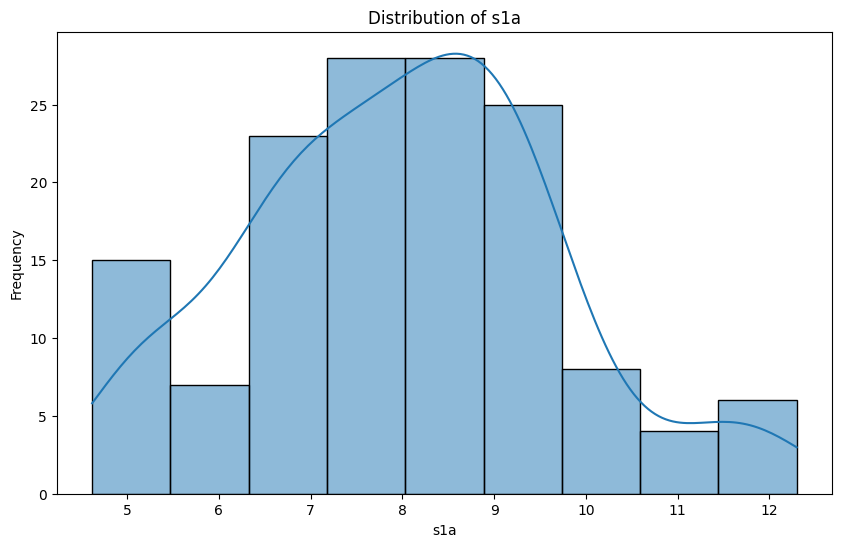


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean       9.423631
std        2.104936
min        5.178200
25%        7.828925
50%        9.125600
75%       10.961600
max       14.495900
Name: s1x, dtype: float64


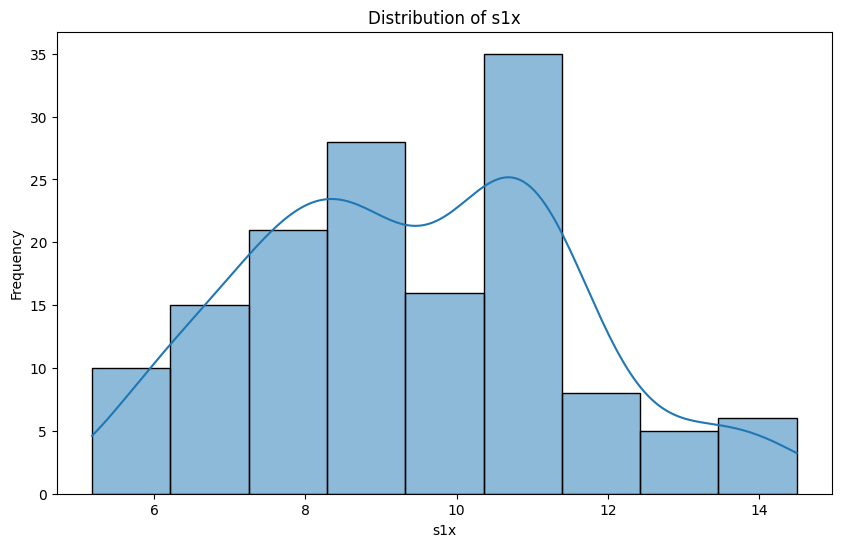


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       6.460213
std        1.281913
min        3.617600
25%        5.660150
50%        6.624050
75%        7.174850
max        9.997700
Name: s1i, dtype: float64


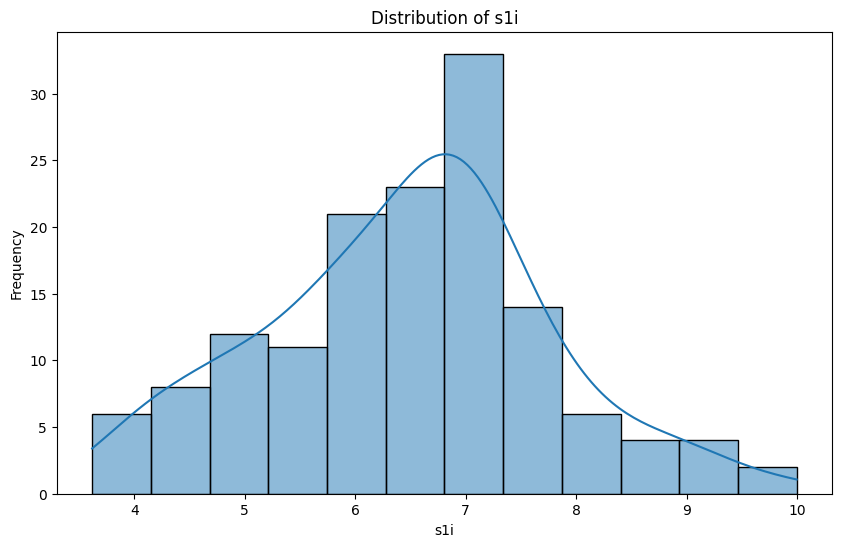


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.542098
std        0.244609
min        0.119340
25%        0.308677
50%        0.562275
75%        0.740138
max        1.124550
Name: s1s, dtype: float64


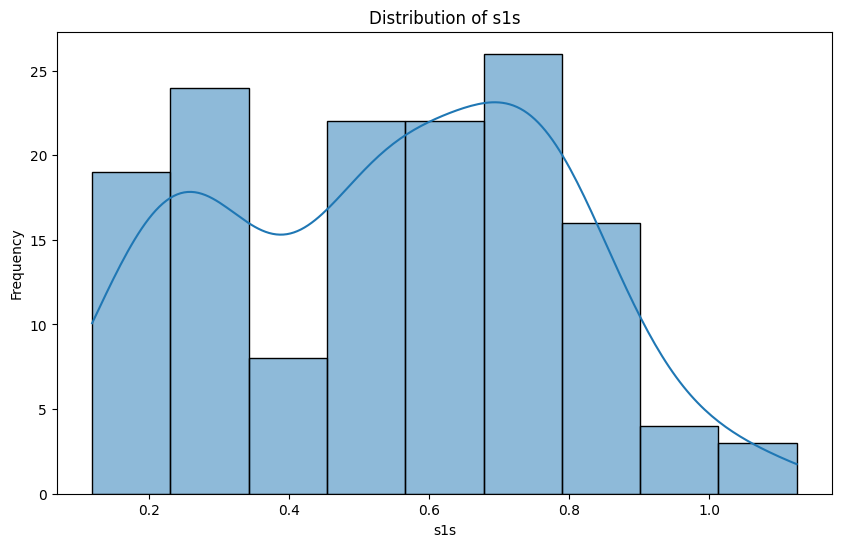


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       7.993994
std        1.655664
min        4.589680
25%        6.823863
50%        7.967920
75%        9.074110
max       12.181540
Name: s2a, dtype: float64


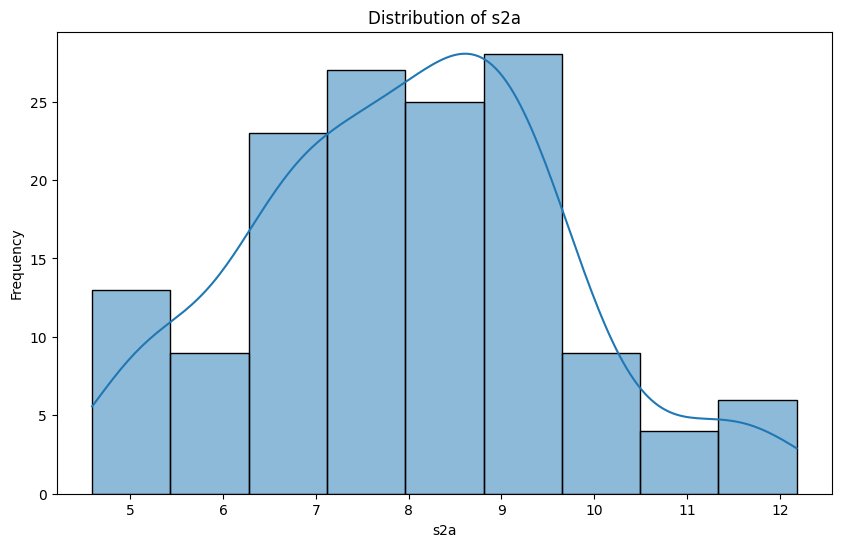


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean       9.431556
std        2.124190
min        5.223100
25%        7.770550
50%        9.285250
75%       10.983550
max       14.770300
Name: s2x, dtype: float64


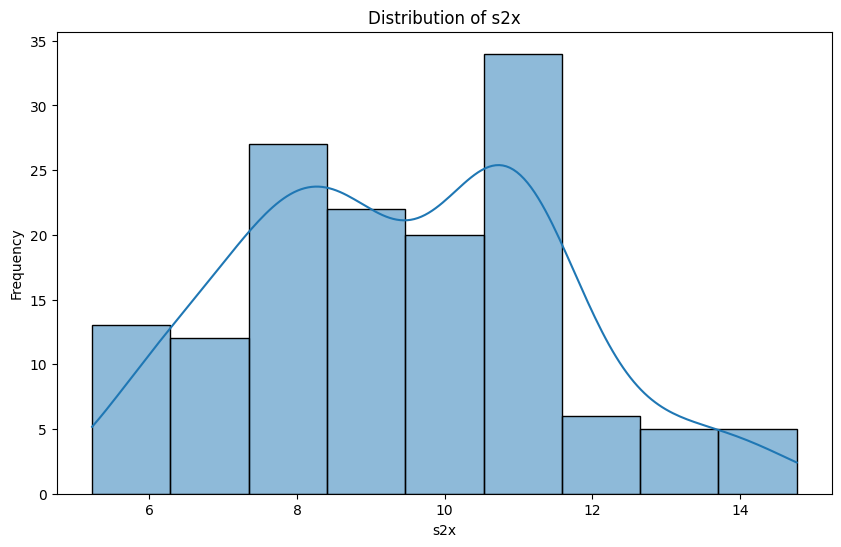


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       6.428931
std        1.272136
min        3.524800
25%        5.659150
50%        6.600100
75%        7.150900
max        9.904900
Name: s2i, dtype: float64


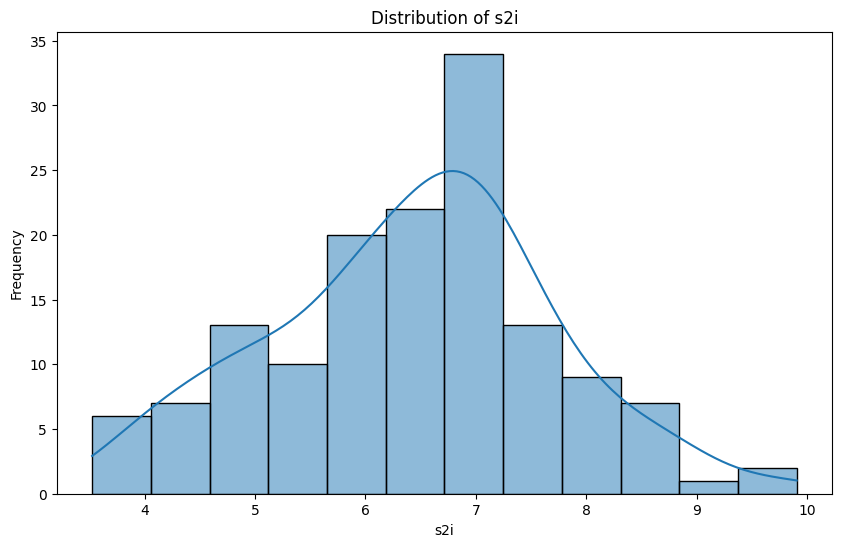


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.542895
std        0.245131
min        0.123930
25%        0.301793
50%        0.564570
75%        0.738990
max        1.147500
Name: s2s, dtype: float64


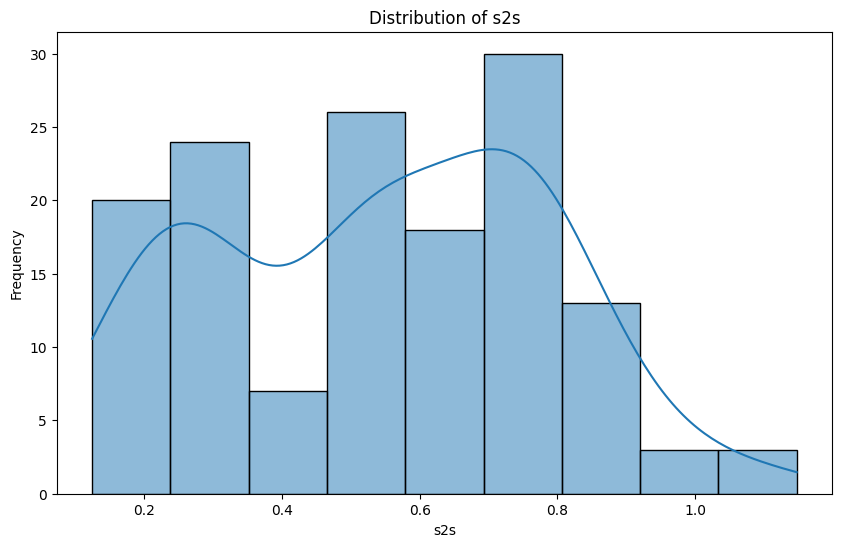


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       7.713412
std        1.594559
min        4.181580
25%        6.546177
50%        7.892465
75%        8.840827
max       11.103360
Name: s3a, dtype: float64


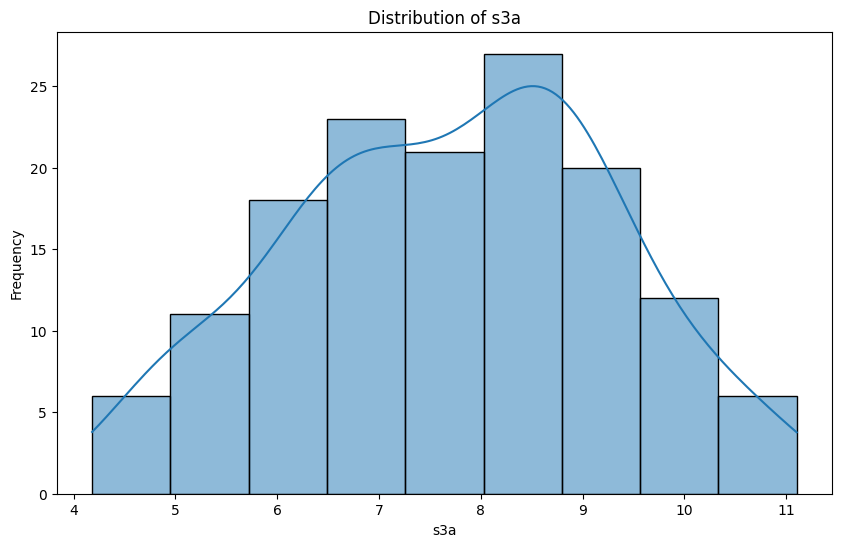


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean       9.225625
std        2.106363
min        4.810000
25%        7.608070
50%        9.351130
75%       10.876307
max       13.800520
Name: s3x, dtype: float64


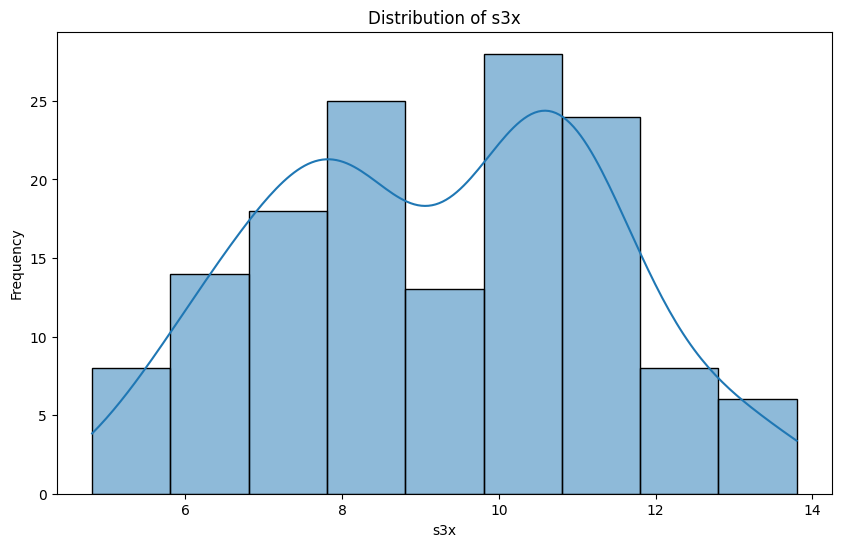


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       6.106783
std        1.175098
min        3.617380
25%        5.406310
50%        6.140230
75%        6.931488
max        8.433730
Name: s3i, dtype: float64


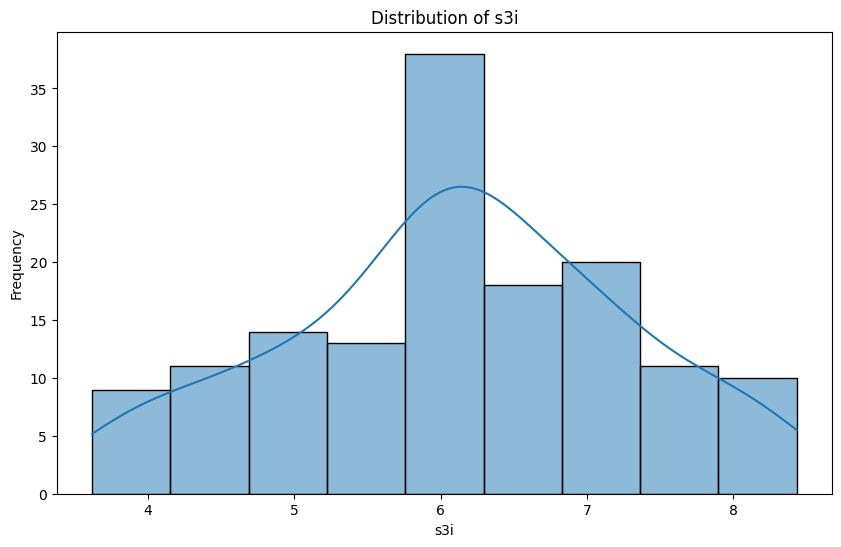


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.562449
std        0.245317
min        0.114680
25%        0.331410
50%        0.573370
75%        0.757997
max        1.197210
Name: s3s, dtype: float64


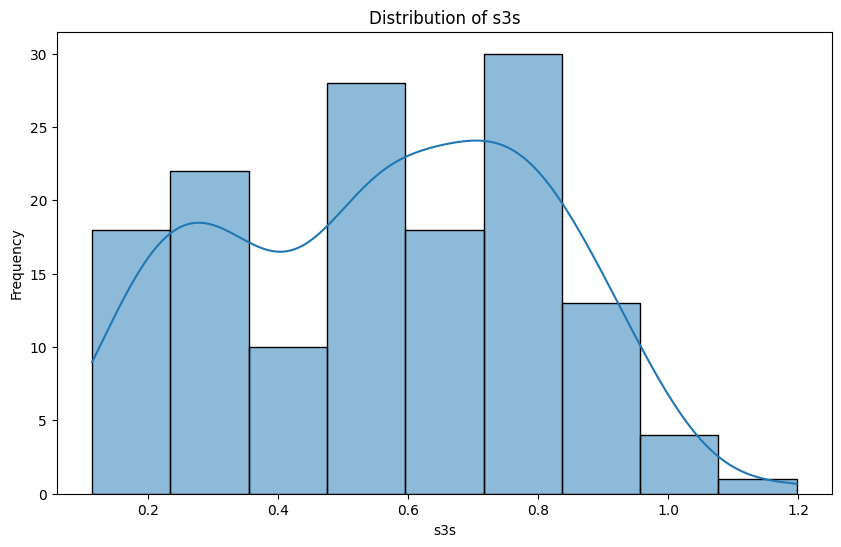


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean     118.145833
std       38.095384
min       16.000000
25%      109.000000
50%      127.000000
75%      144.250000
max      158.000000
Name: d1a, dtype: float64


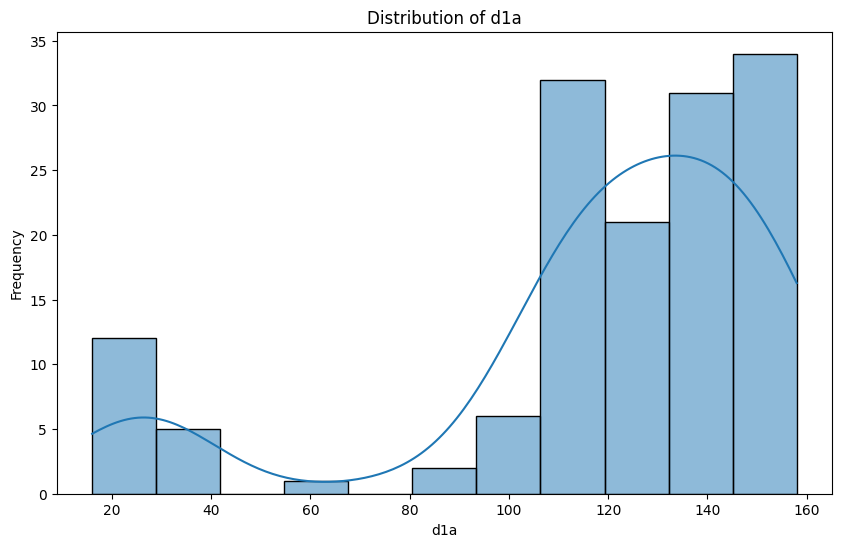


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       4.201389
std        2.156726
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       12.000000
Name: d1s, dtype: float64


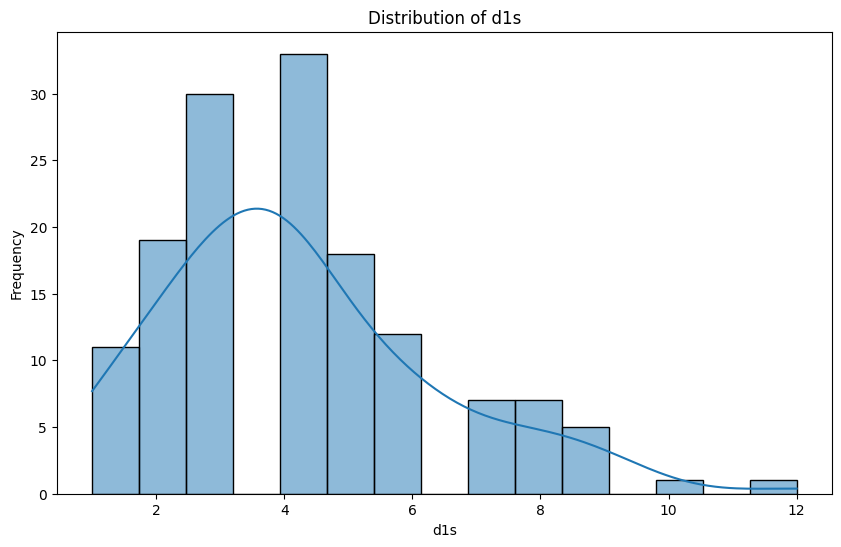


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean     117.354167
std       37.269284
min       15.000000
25%      112.000000
50%      128.000000
75%      140.000000
max      157.000000
Name: d2a, dtype: float64


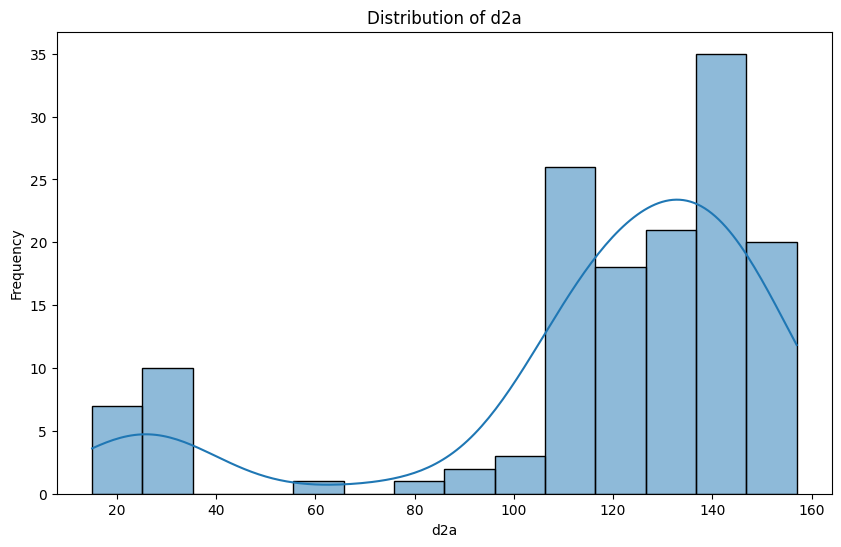


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       4.847222
std        2.254194
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       11.000000
Name: d2s, dtype: float64


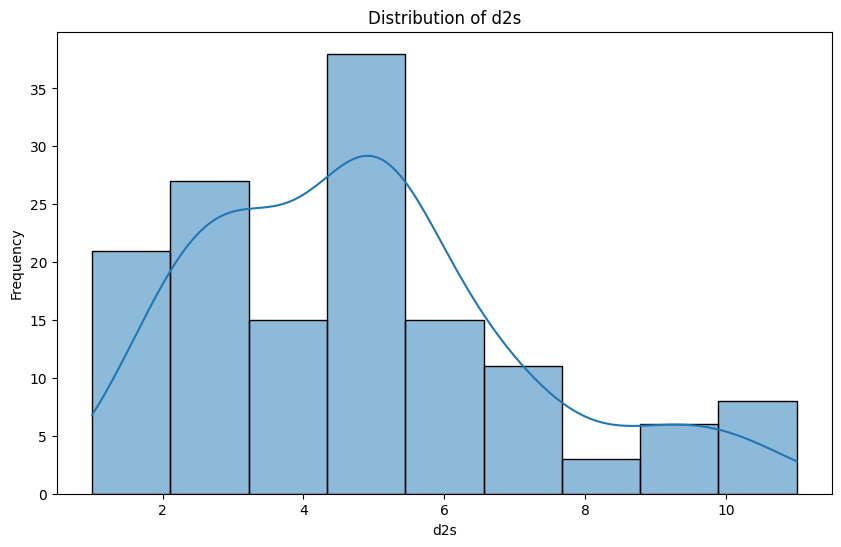


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      80.375000
std       12.283296
min       64.000000
25%       71.000000
50%       76.000000
75%       87.000000
max      104.000000
Name: h1a, dtype: float64


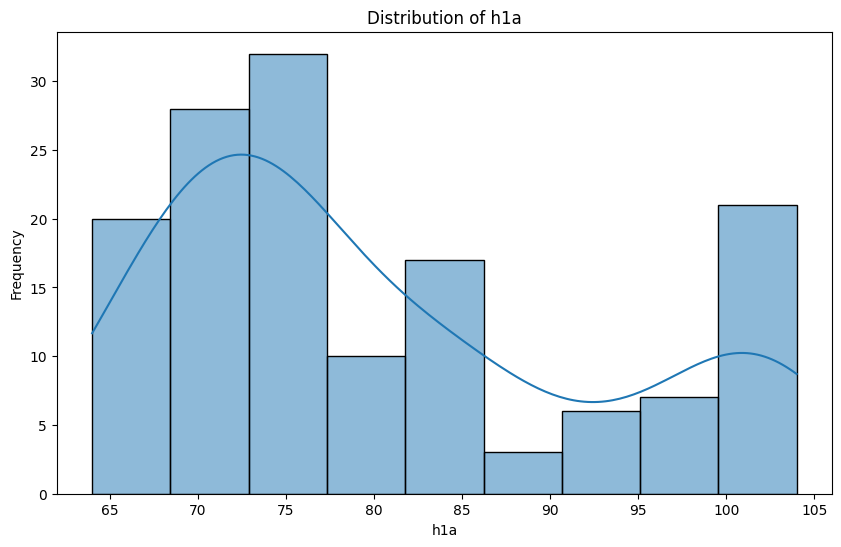


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      81.326389
std       12.019116
min       65.000000
25%       71.000000
50%       77.000000
75%       88.750000
max      104.000000
Name: h1x, dtype: float64


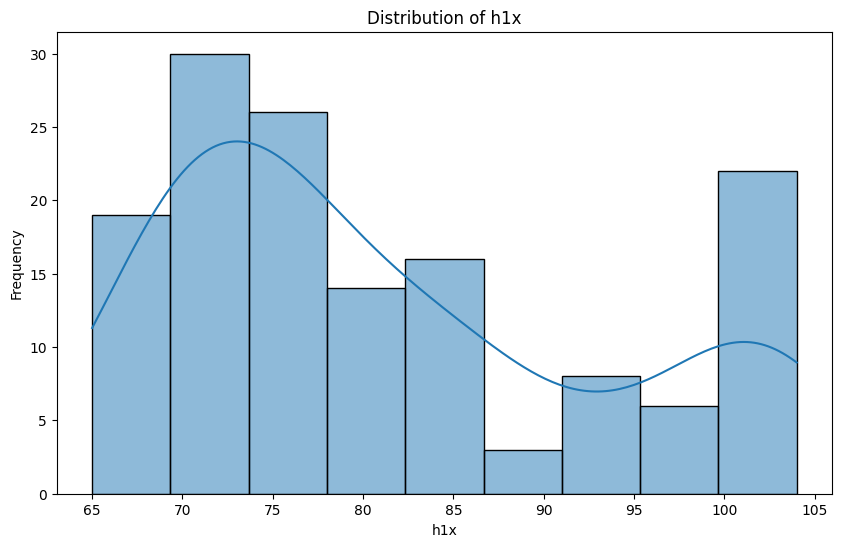


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      79.479167
std       12.382578
min       62.000000
25%       70.000000
50%       76.000000
75%       86.000000
max      104.000000
Name: h1i, dtype: float64


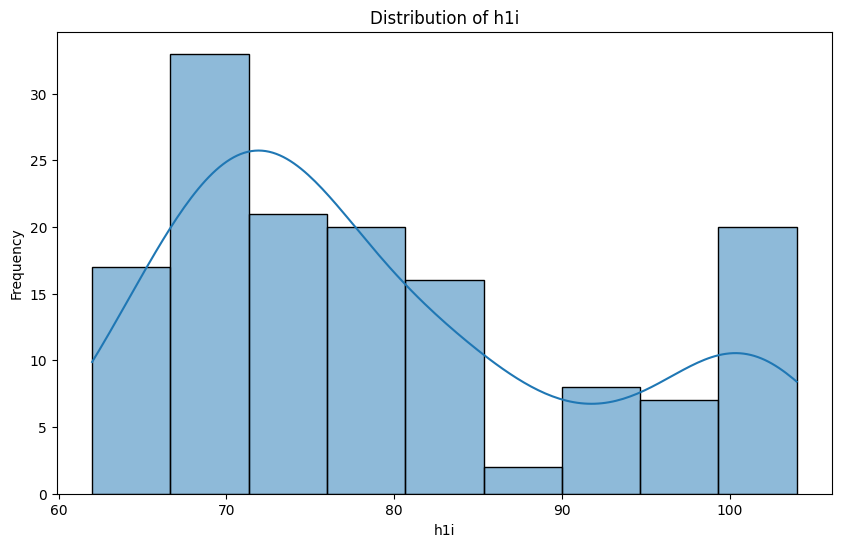


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       1.880556
std        3.091682
min       -2.850000
25%       -0.375000
50%        1.550000
75%        2.550000
max        8.850000
Name: t1a, dtype: float64


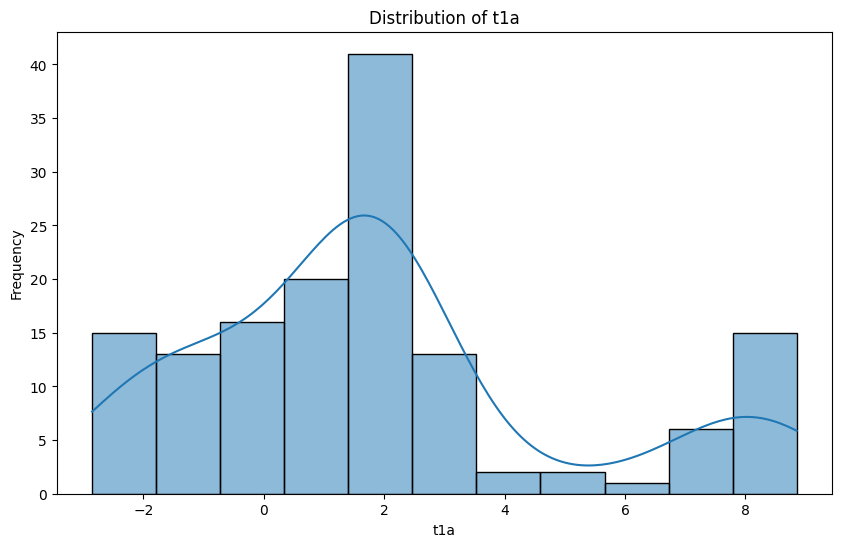


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       1.966667
std        3.101004
min       -2.550000
25%       -0.350000
50%        1.650000
75%        2.650000
max        8.850000
Name: t1x, dtype: float64


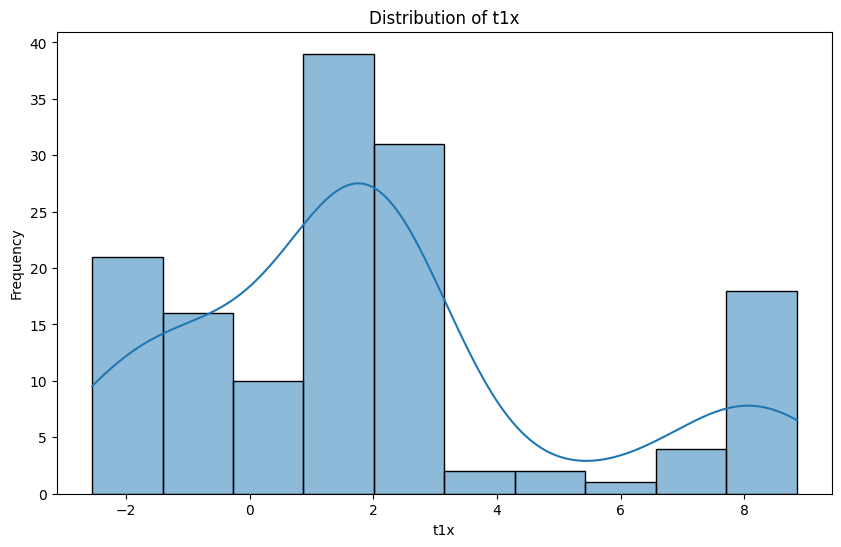


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       1.793056
std        3.075476
min       -3.050000
25%       -0.450000
50%        1.450000
75%        2.450000
max        8.750000
Name: t1i, dtype: float64


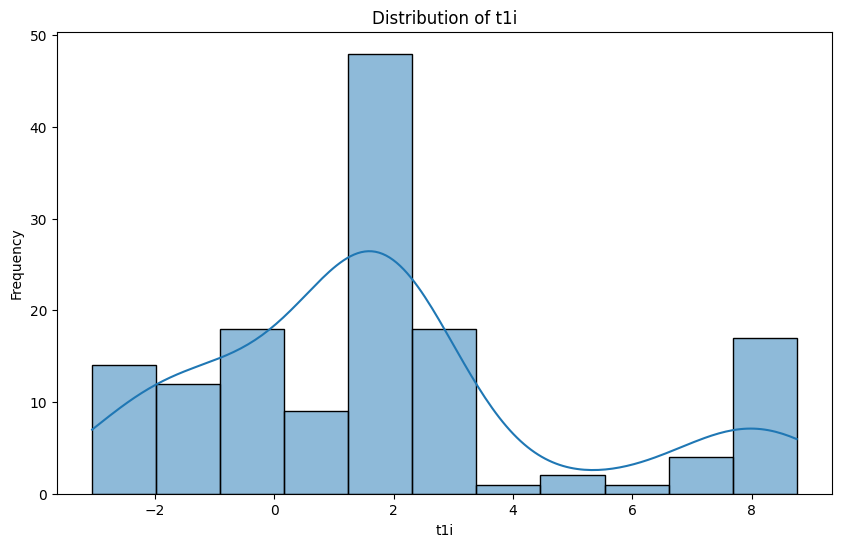


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1005.861111
std         4.928313
min       998.000000
25%      1002.000000
50%      1006.000000
75%      1011.000000
max      1013.000000
Name: b1a, dtype: float64


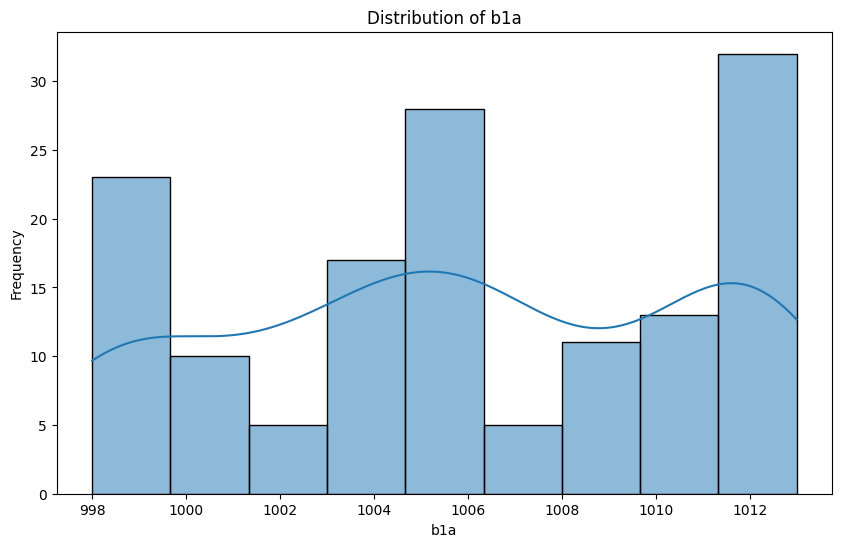


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1006.159722
std         4.835277
min       998.000000
25%      1002.750000
50%      1006.000000
75%      1011.000000
max      1013.000000
Name: b1x, dtype: float64


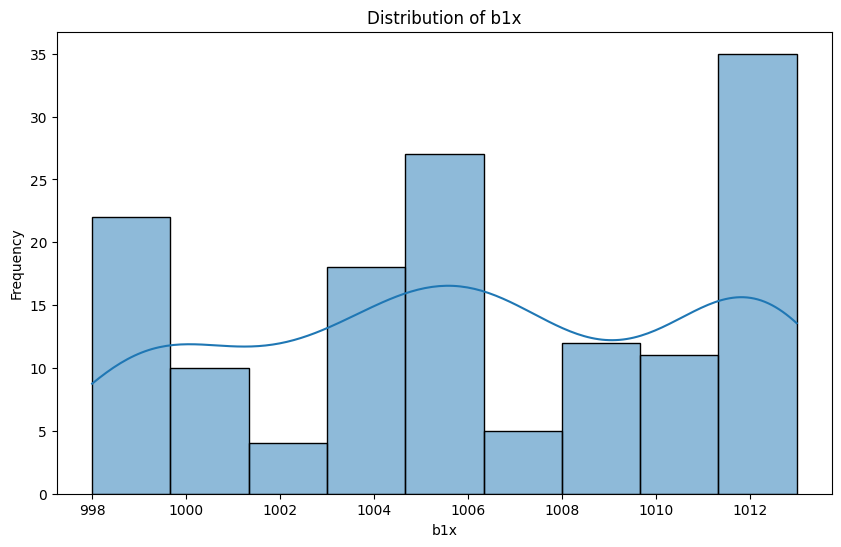


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1005.465278
std         4.844308
min       998.000000
25%      1002.000000
50%      1005.000000
75%      1011.000000
max      1013.000000
Name: b1i, dtype: float64


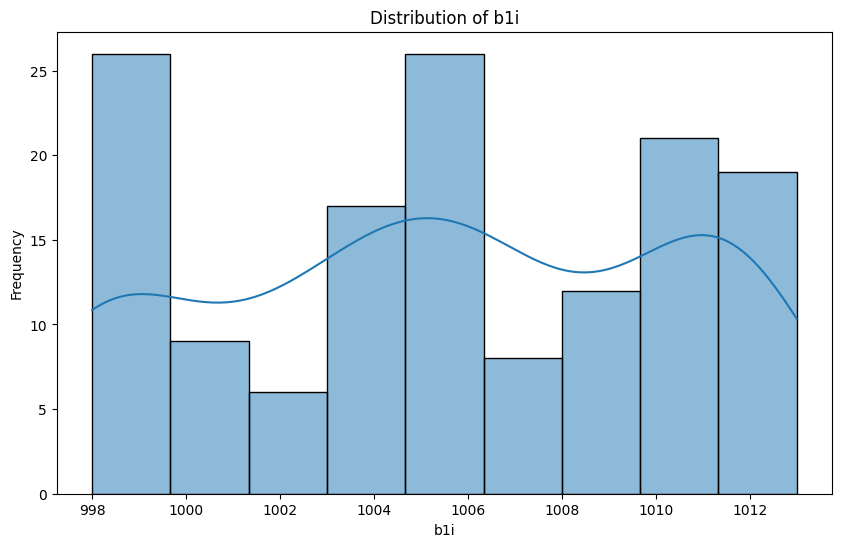


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       7.164280
std        1.613442
min        3.451260
25%        5.973010
50%        7.247635
75%        8.529142
max        9.994050
Name: p1a, dtype: float64


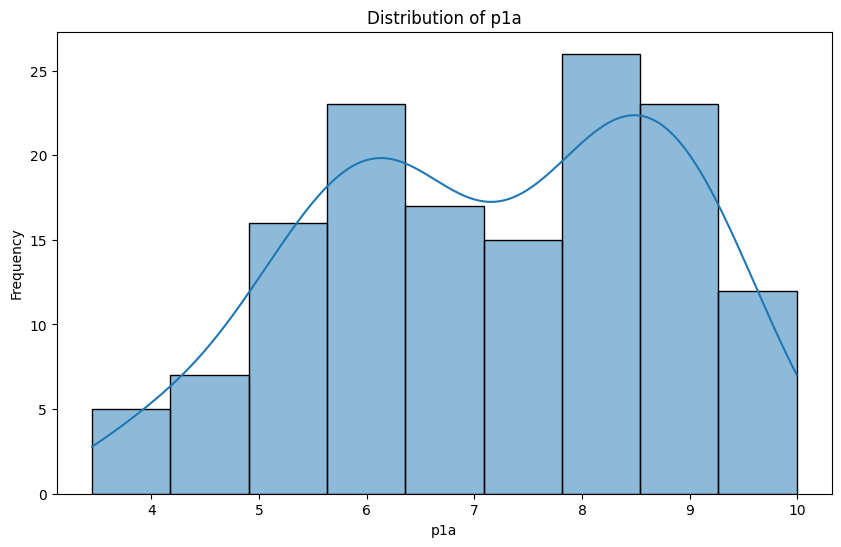


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean       8.728399
std        2.182186
min        4.033550
25%        6.773087
50%        9.099975
75%       10.590100
max       12.790900
Name: p1x, dtype: float64


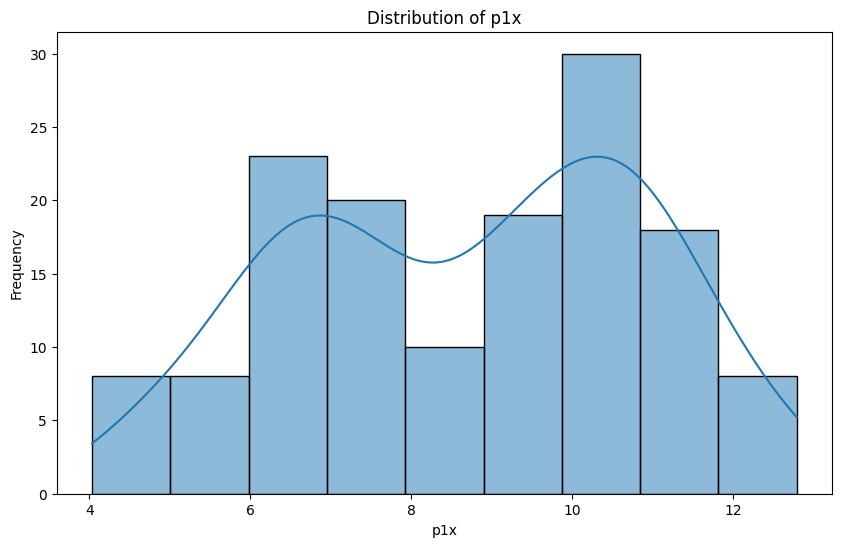


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       5.545008
std        1.071339
min        3.070700
25%        4.847387
50%        5.500750
75%        6.520912
max        7.472300
Name: p1i, dtype: float64


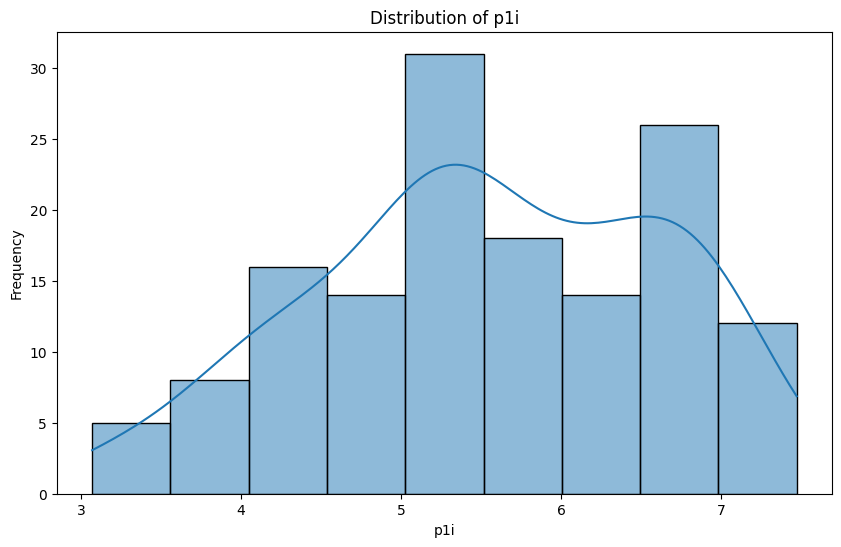


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.589207
std        0.256127
min        0.132970
25%        0.336998
50%        0.635025
75%        0.793210
max        1.210440
Name: p1s, dtype: float64


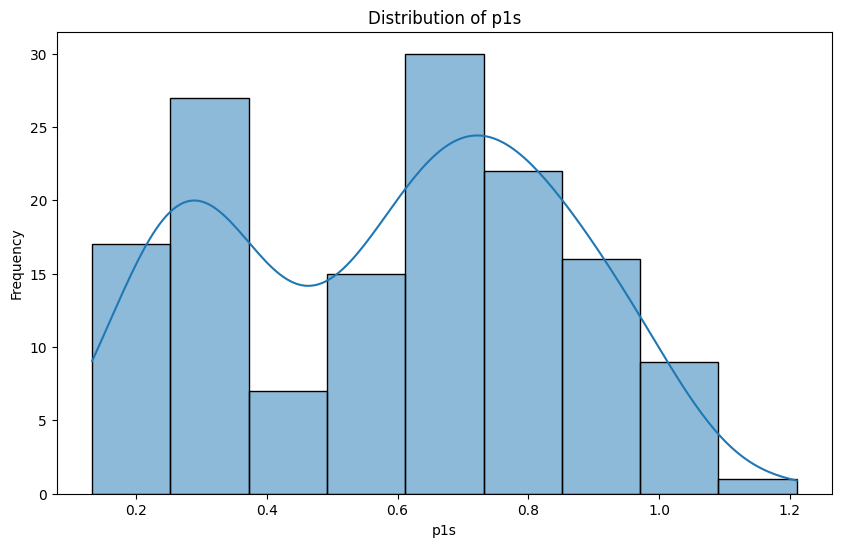


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      43.090278
std        3.877338
min       36.000000
25%       39.000000
50%       44.000000
75%       46.000000
max       48.000000
Name: tia, dtype: float64


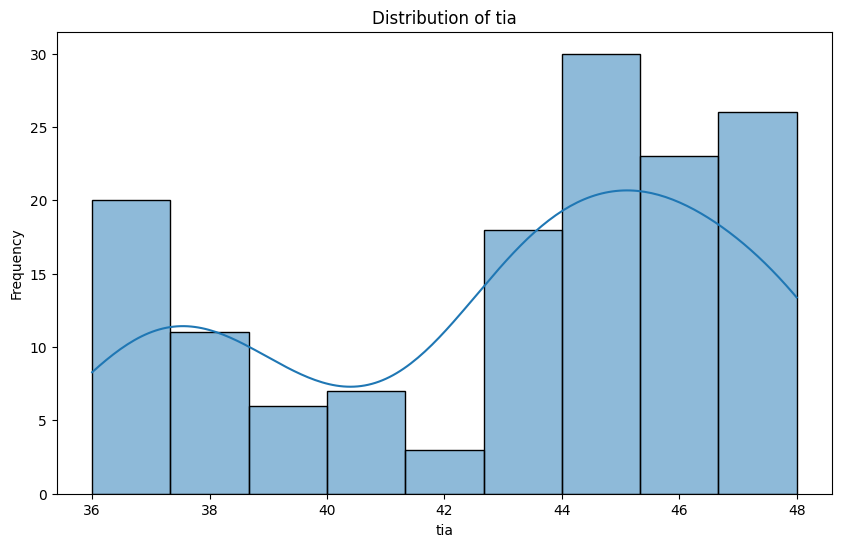


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      43.138889
std        3.882201
min       36.000000
25%       39.750000
50%       44.000000
75%       46.000000
max       49.000000
Name: tix, dtype: float64


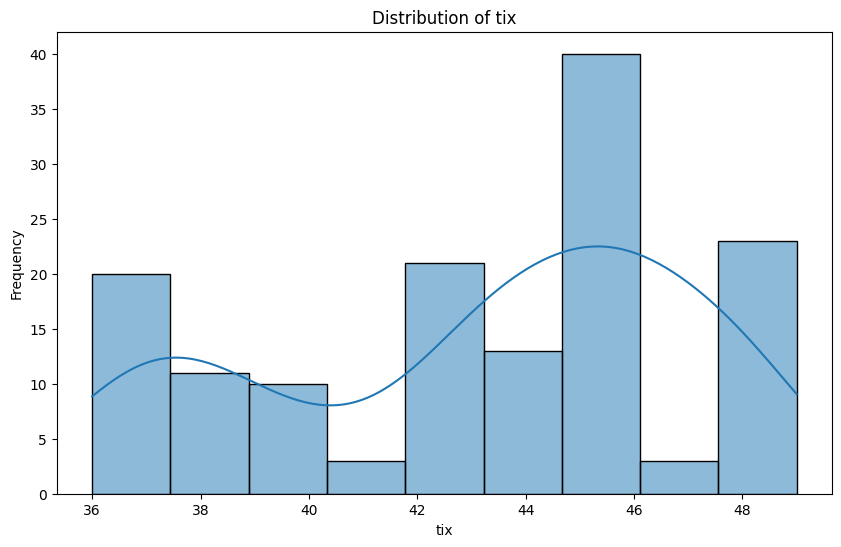


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      42.993056
std        3.874782
min       36.000000
25%       39.000000
50%       44.000000
75%       46.000000
max       48.000000
Name: tii, dtype: float64


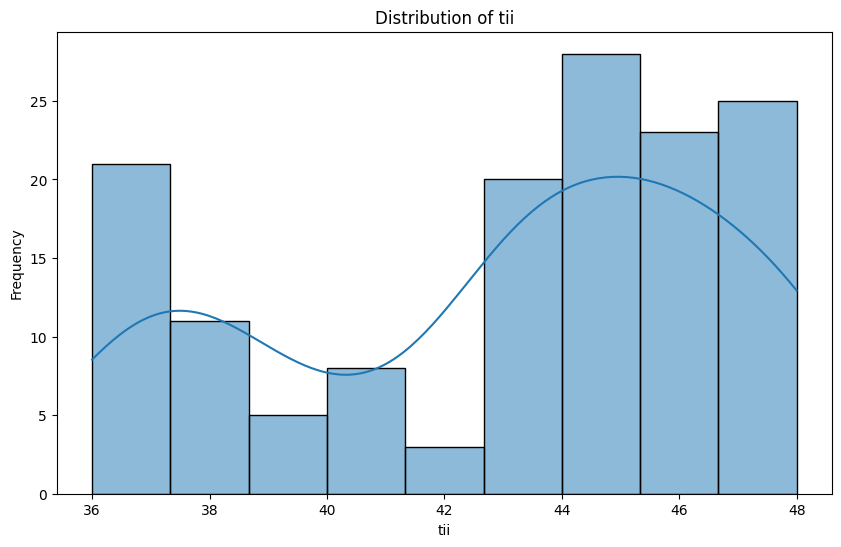


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     130.625000
std        6.091235
min      125.000000
25%      125.000000
50%      126.500000
75%      138.000000
max      139.000000
Name: vxa, dtype: float64


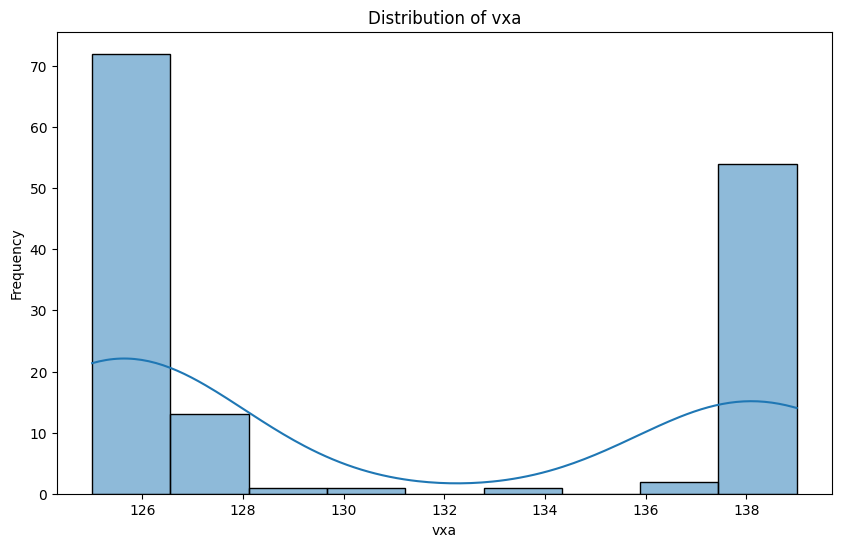


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     131.013889
std        6.382873
min      125.000000
25%      125.000000
50%      127.000000
75%      138.000000
max      141.000000
Name: vxx, dtype: float64


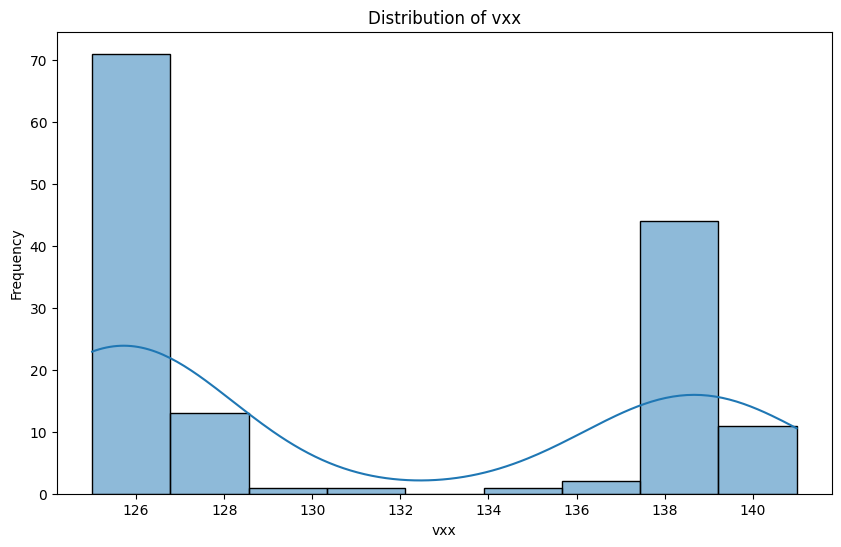


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     130.326389
std        5.914105
min      124.000000
25%      125.000000
50%      126.000000
75%      137.250000
max      139.000000
Name: vxi, dtype: float64


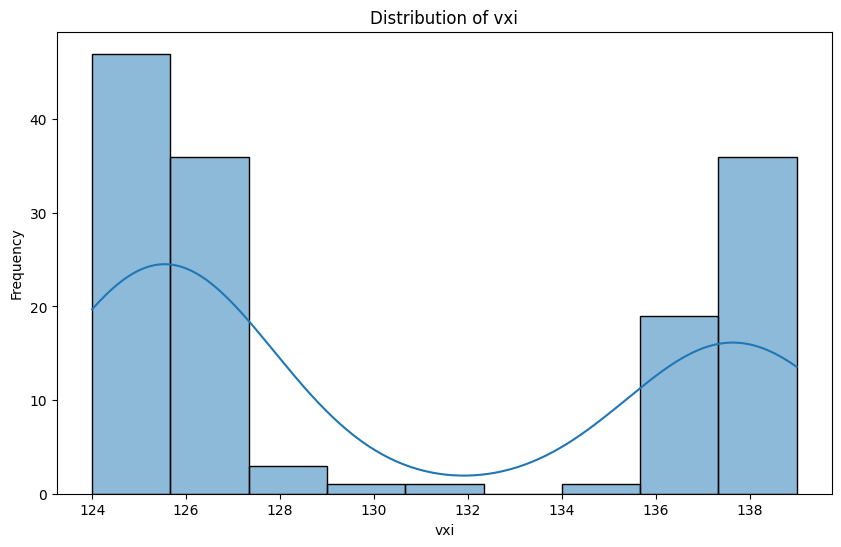


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


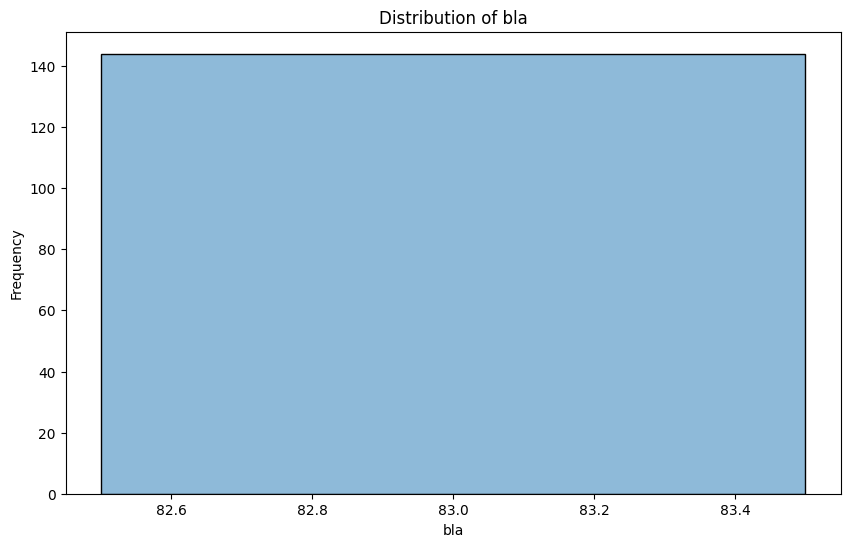


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


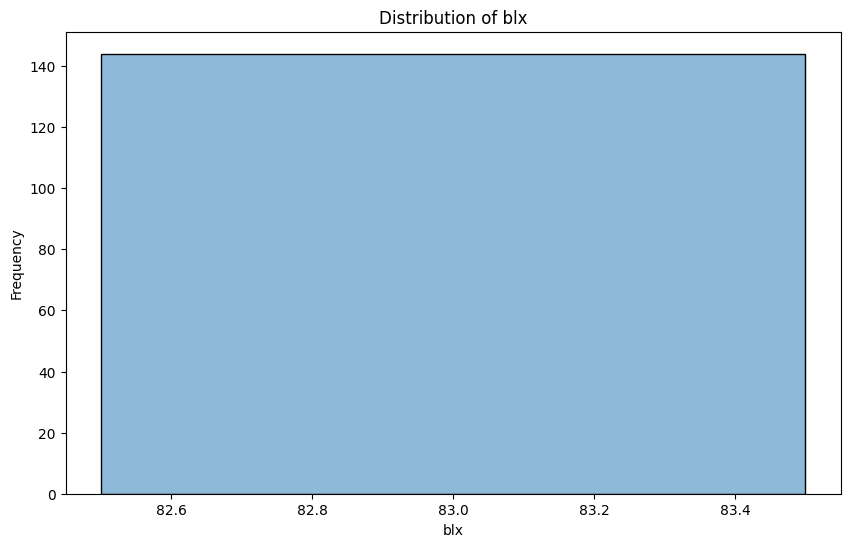


Analysis for column: bli
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bli, dtype: float64


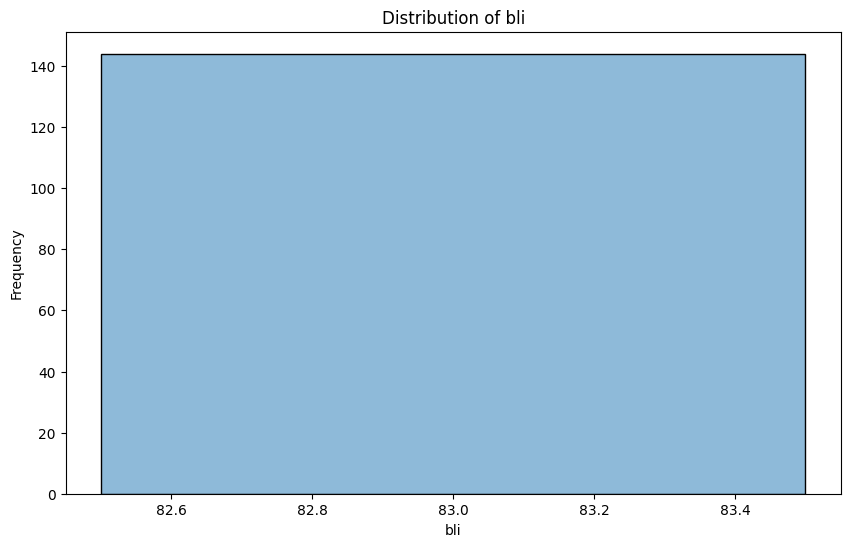


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


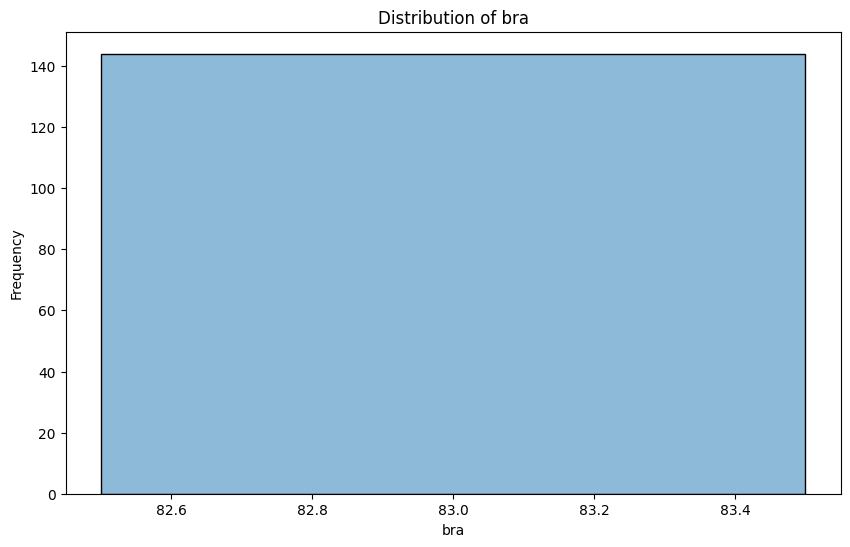


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


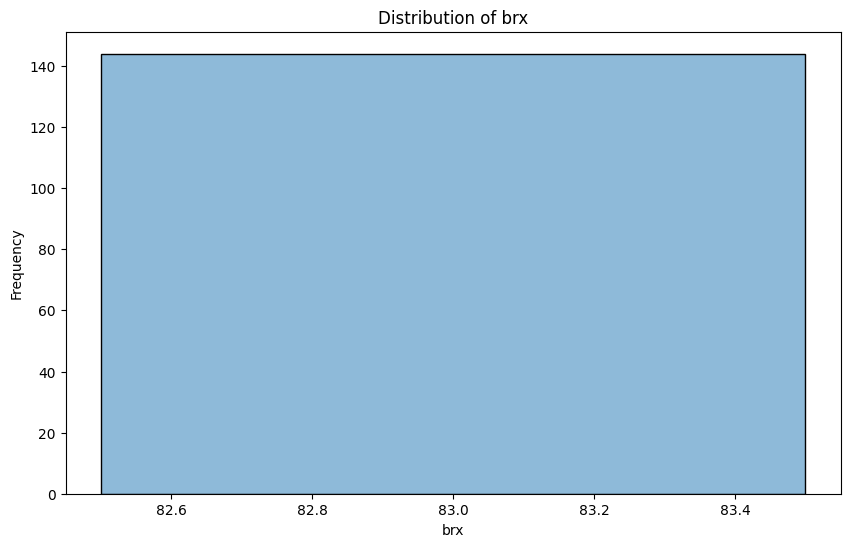


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


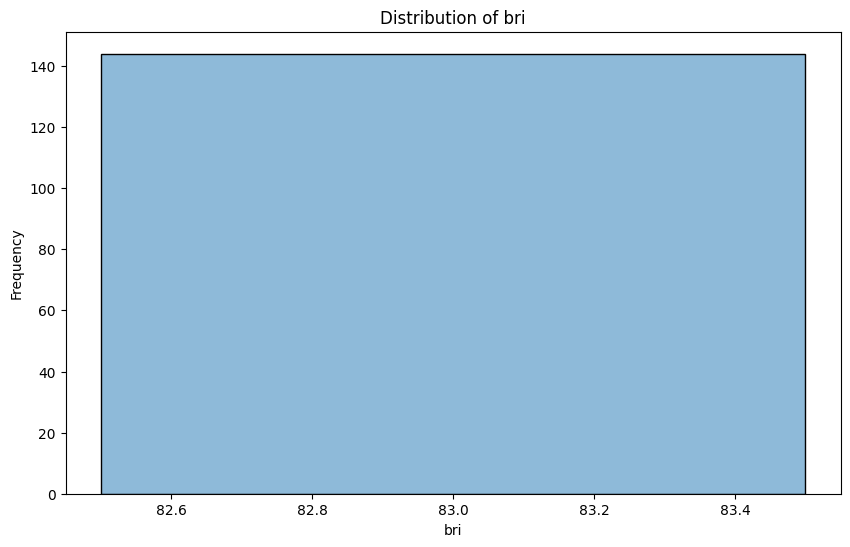

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

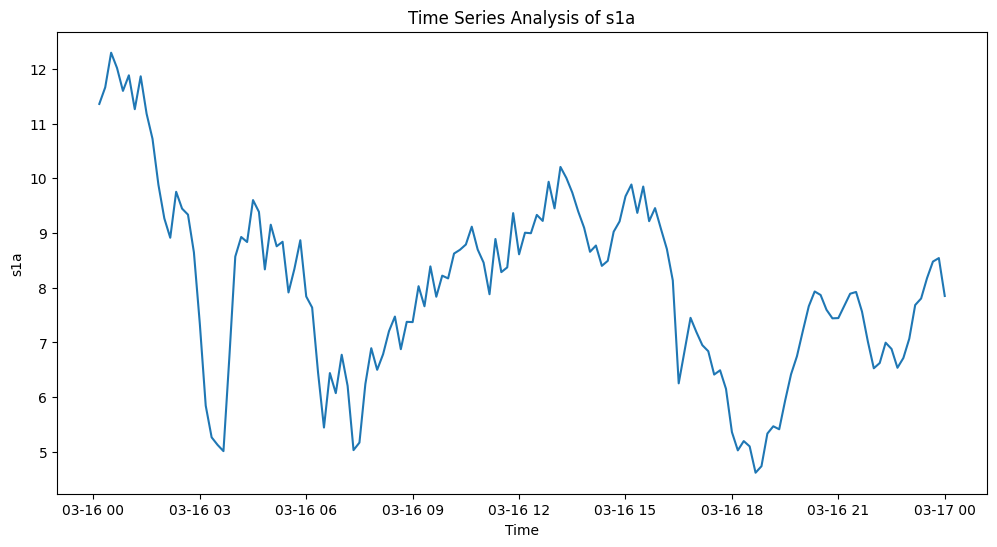

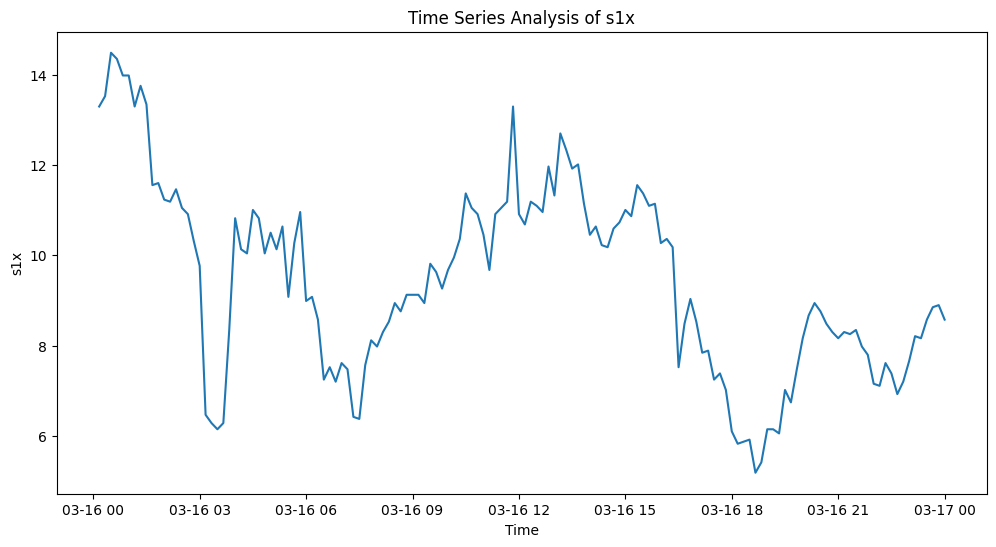

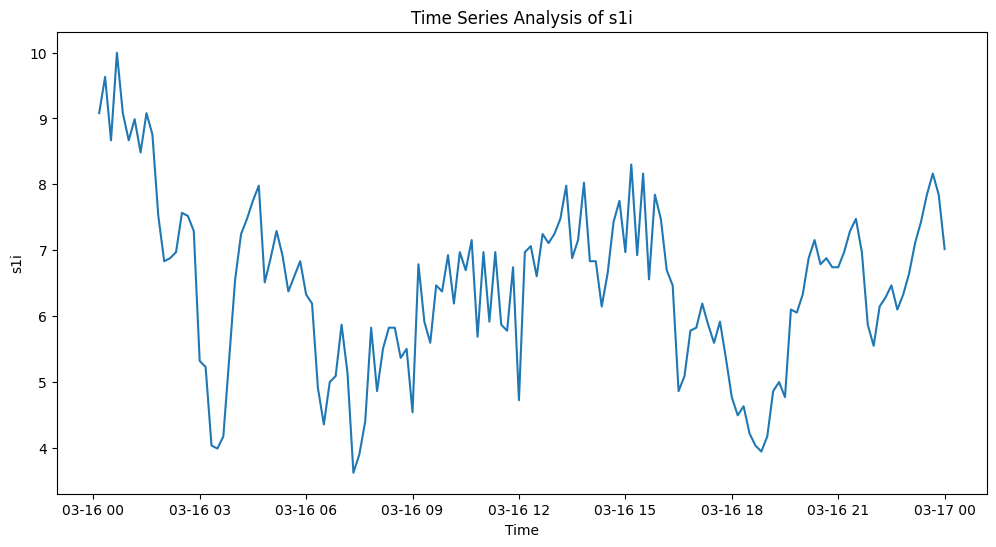

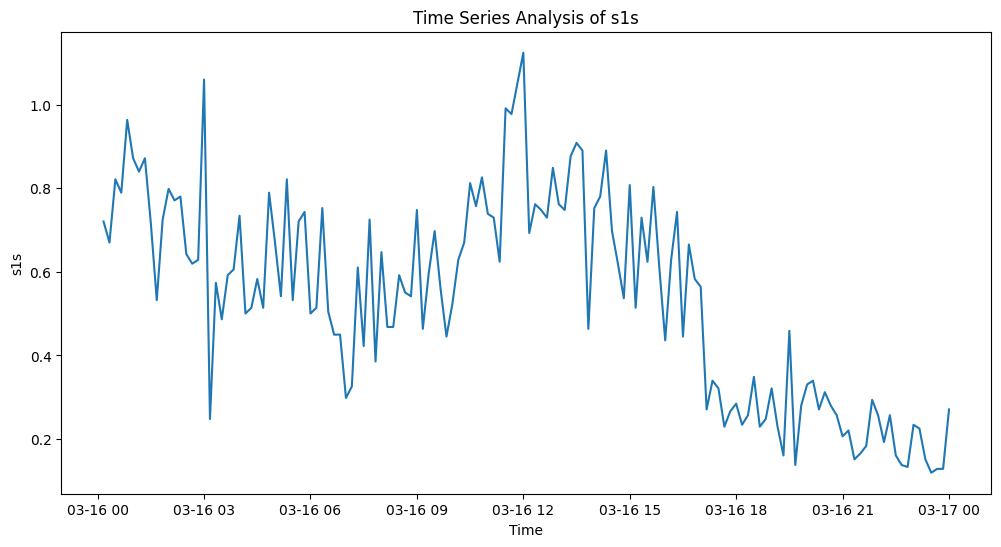

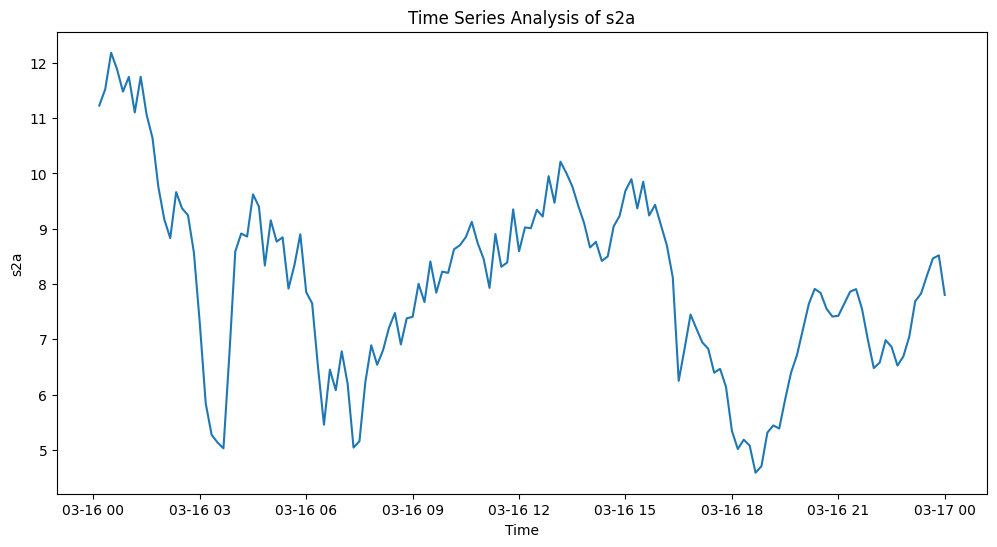

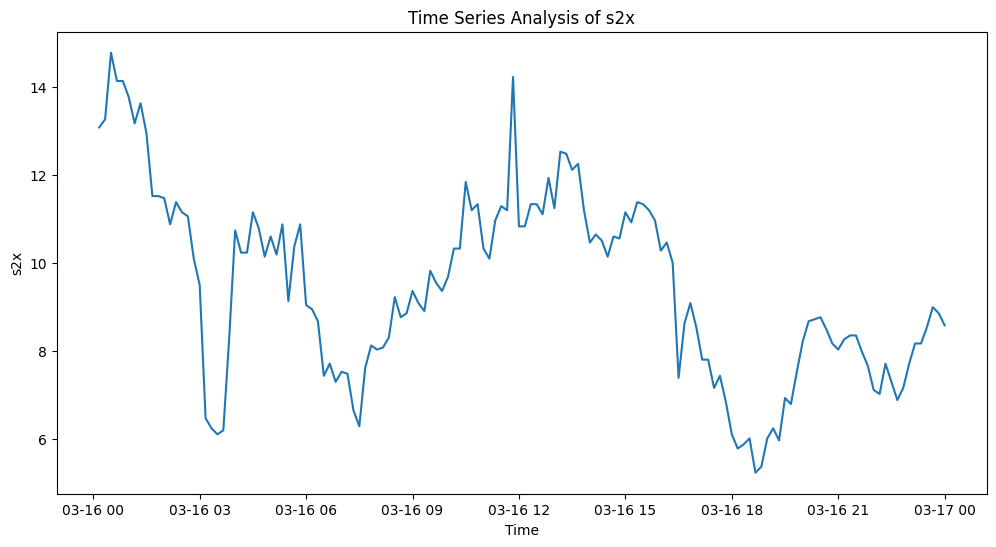

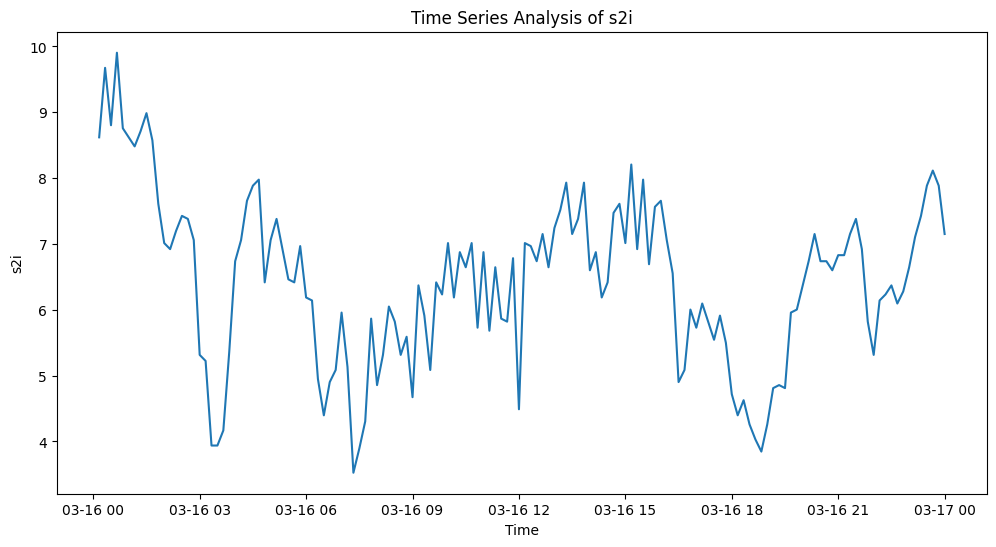

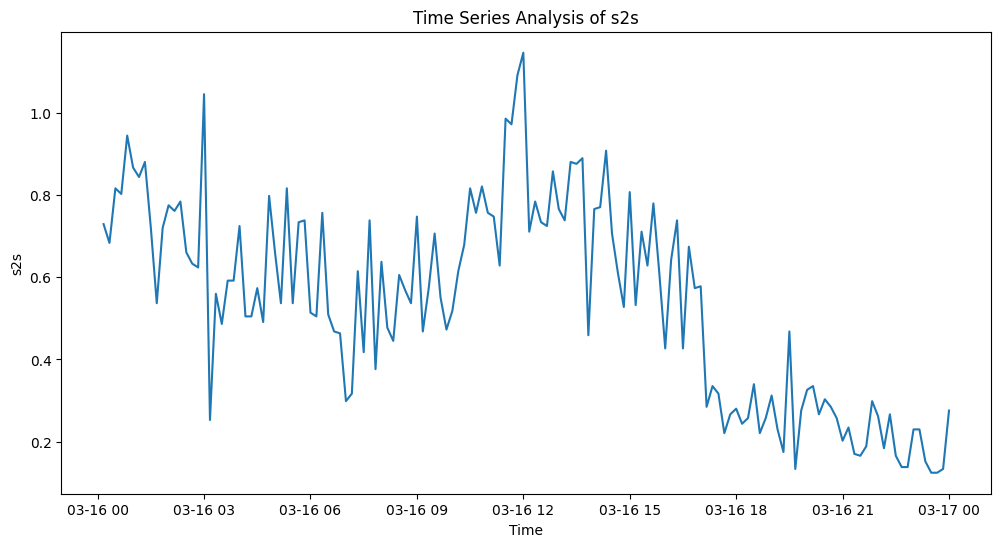

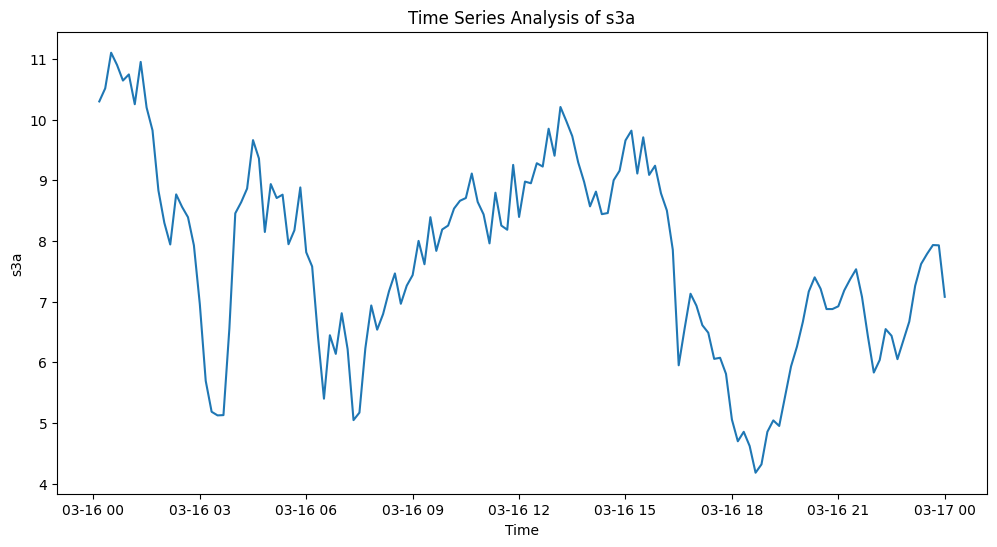

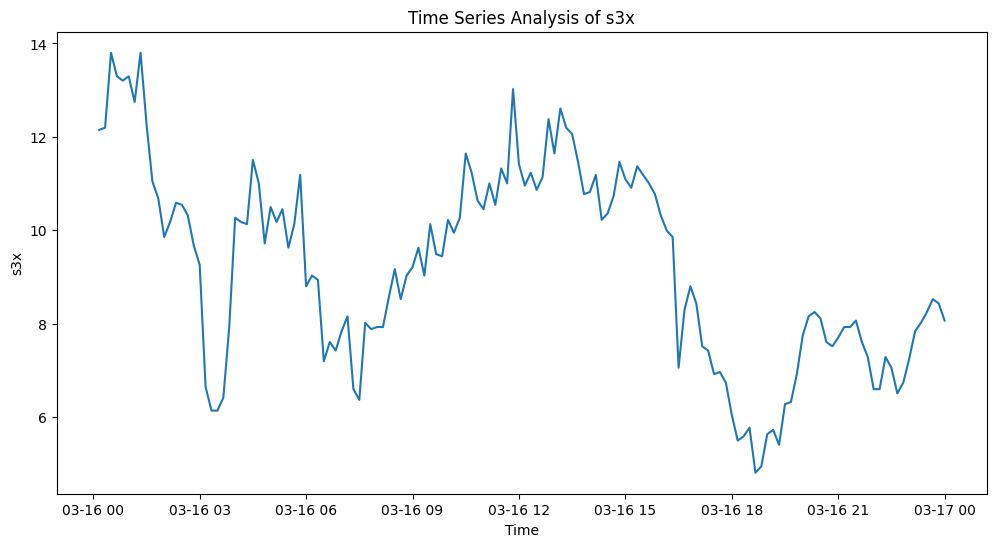

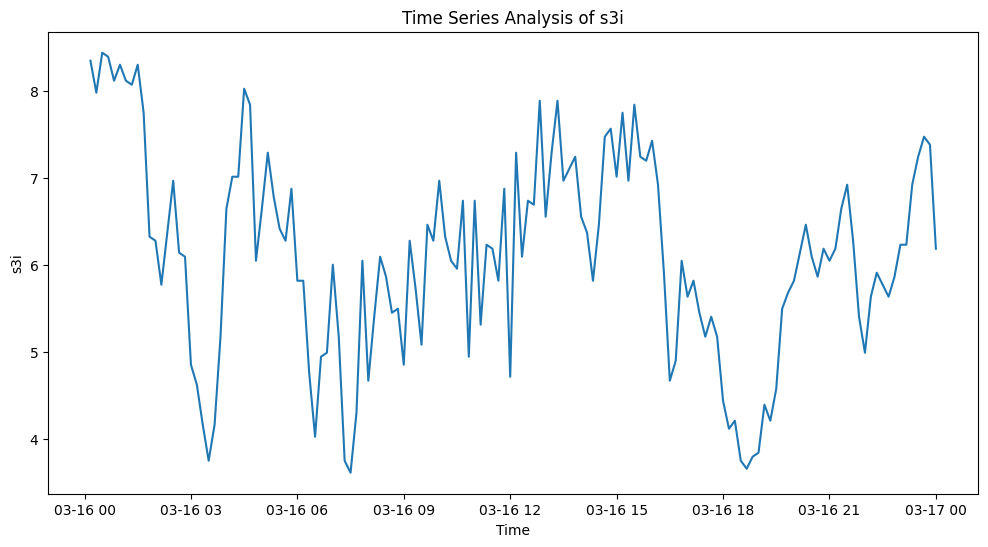

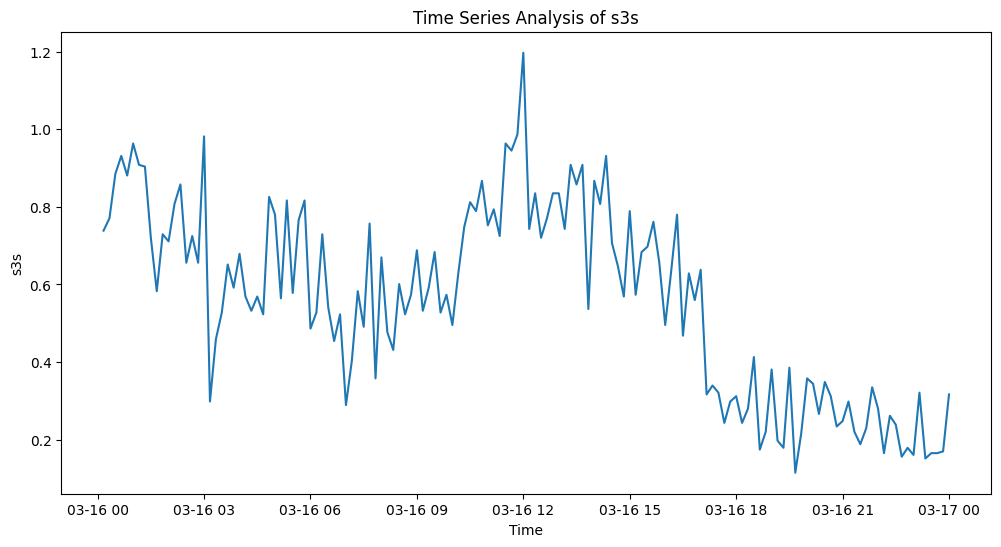

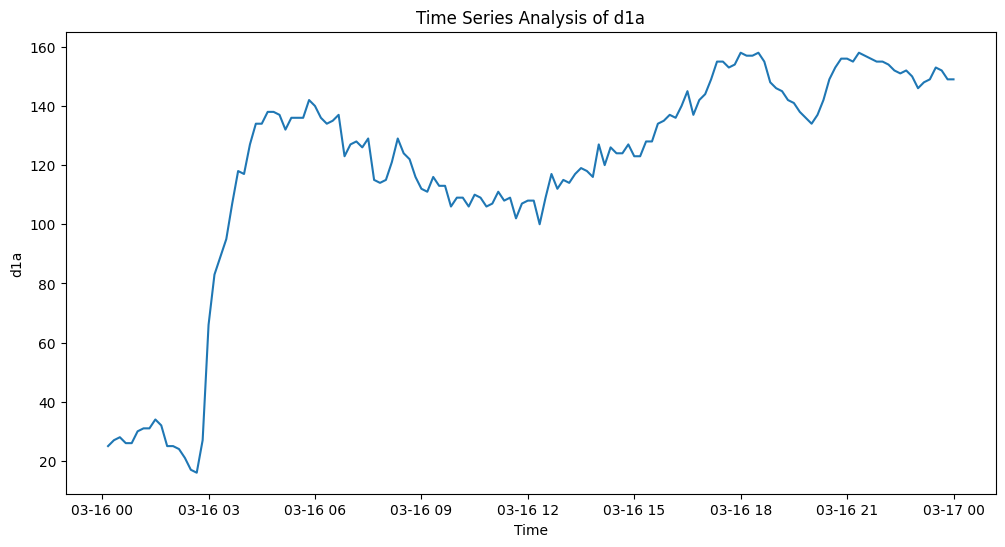

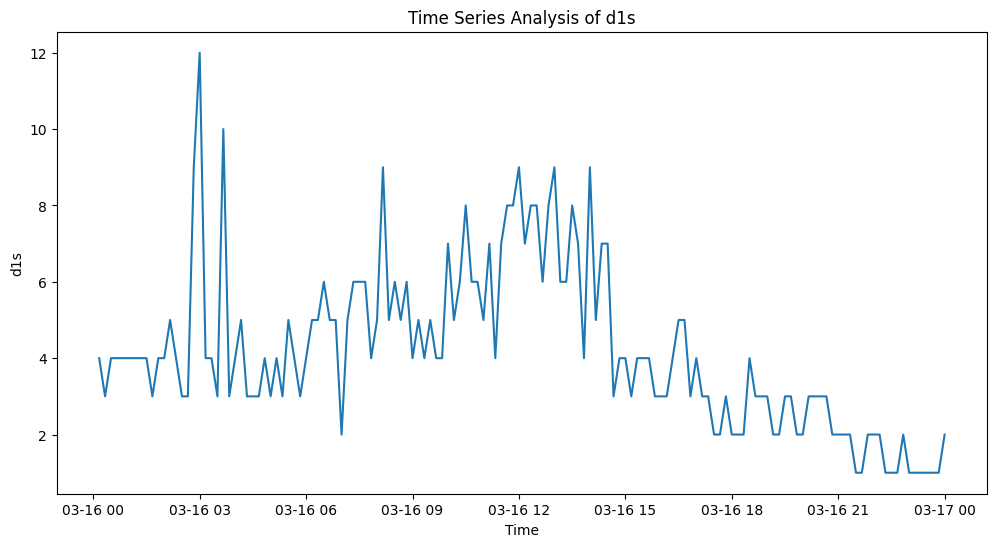

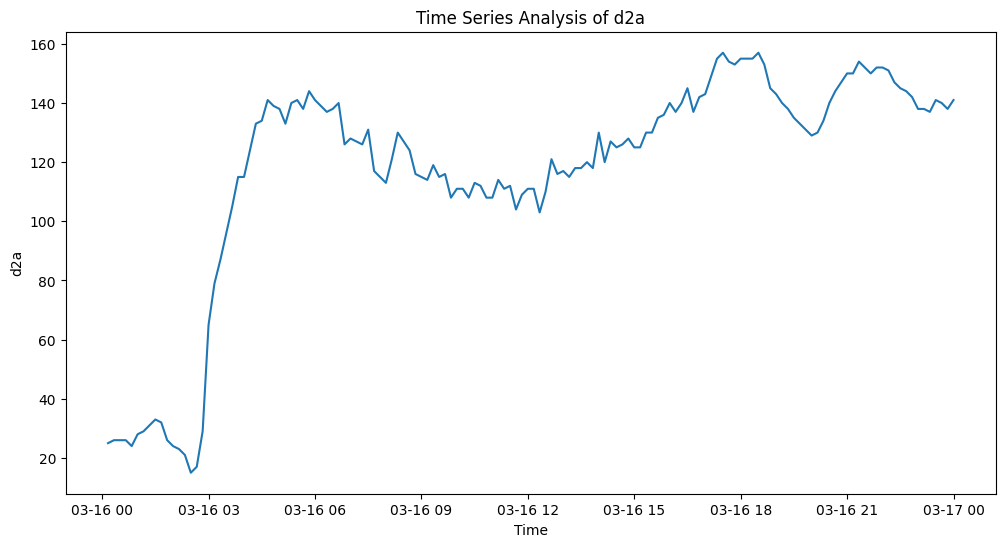

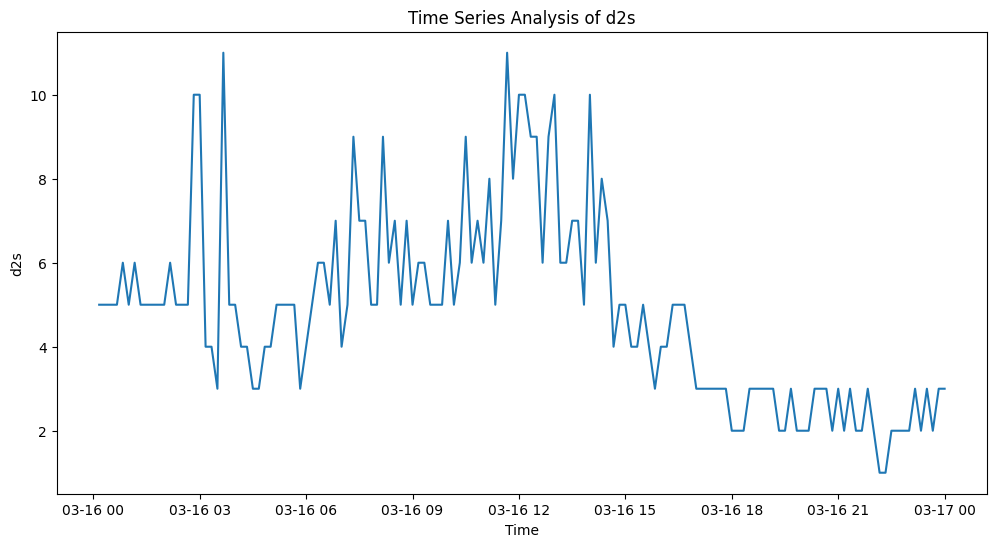

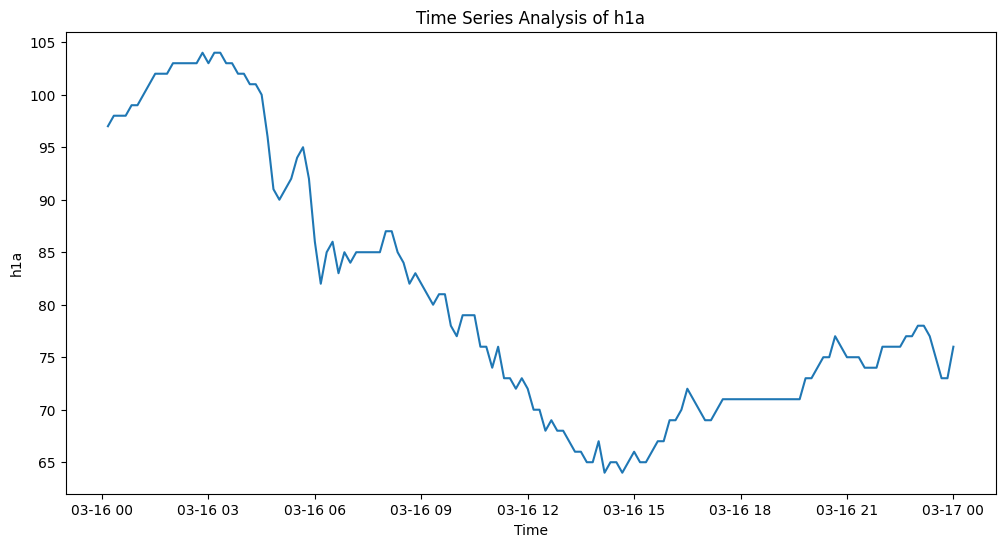

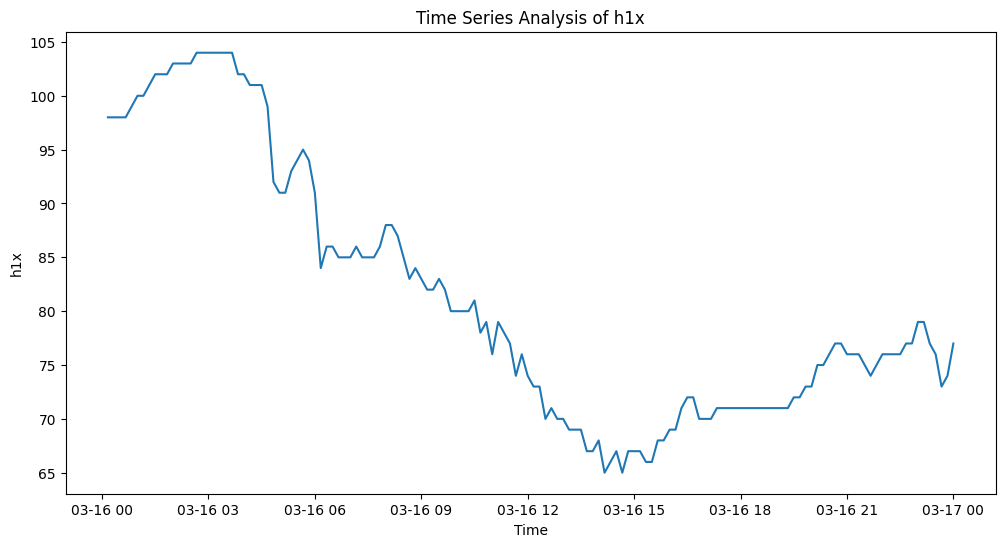

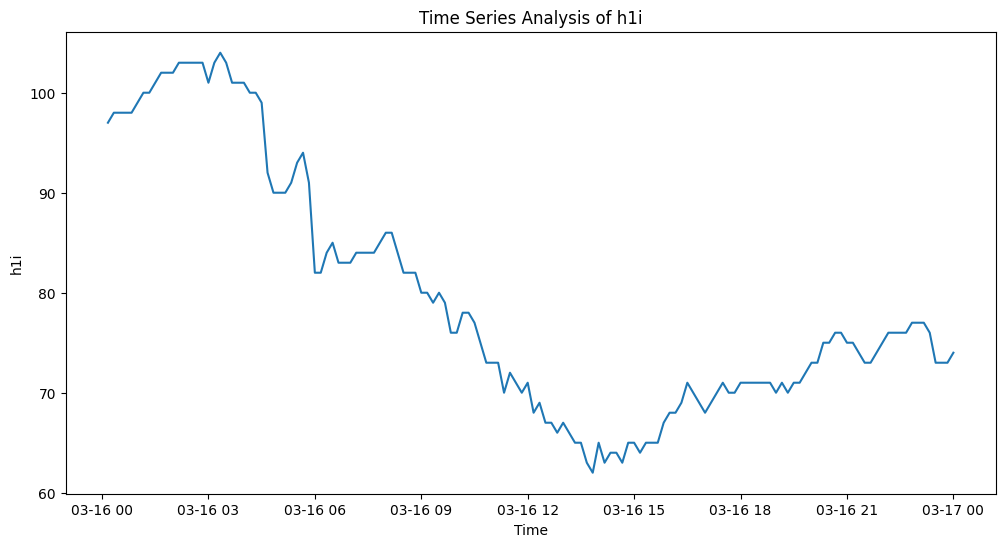

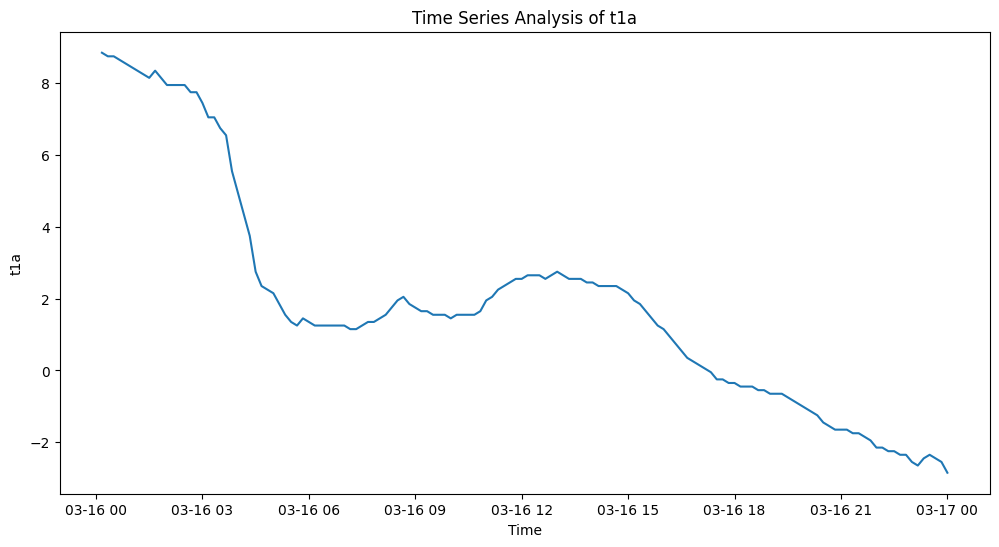

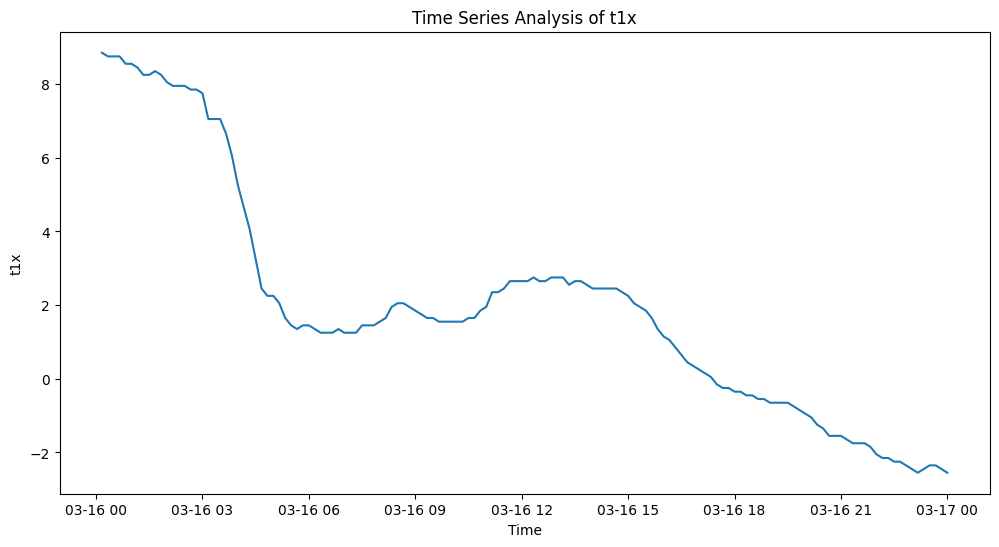

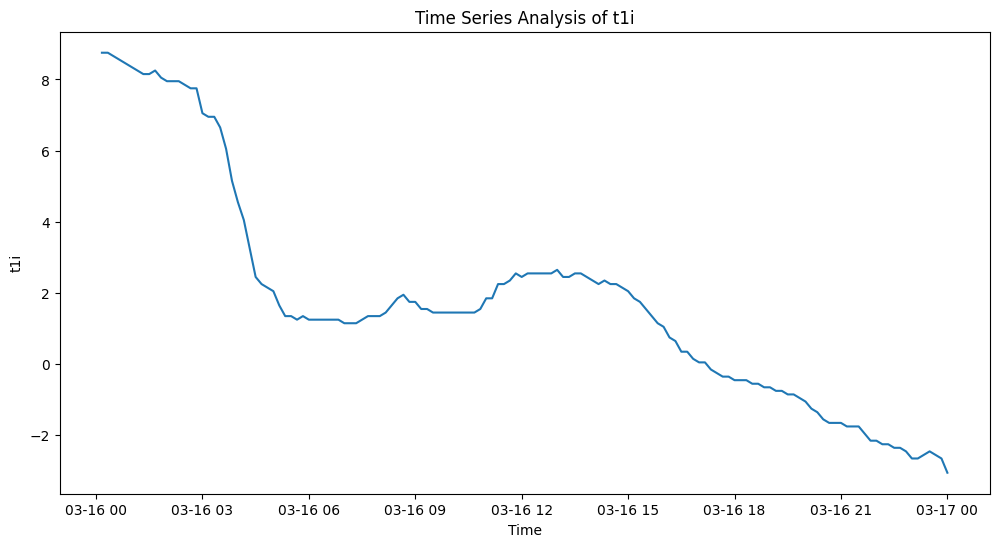

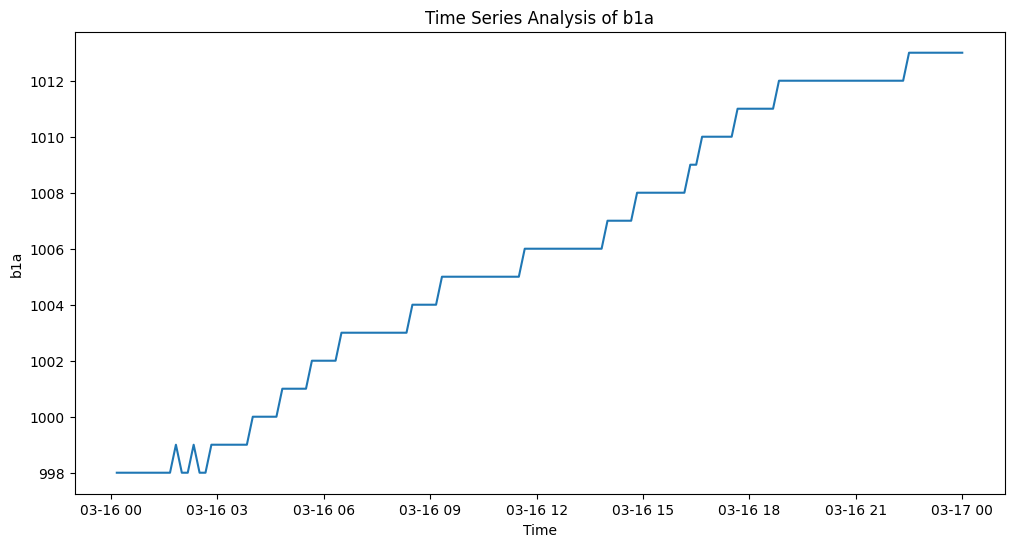

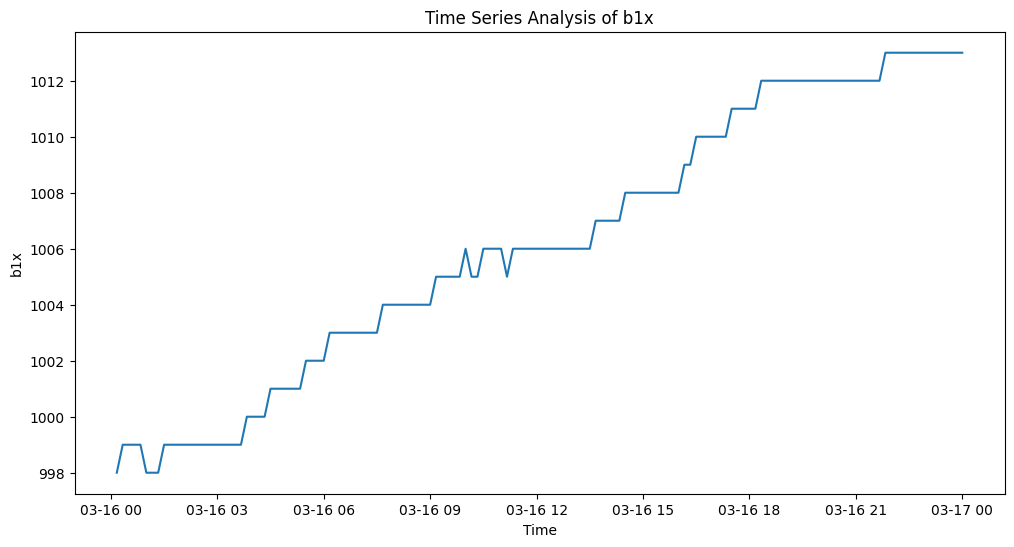

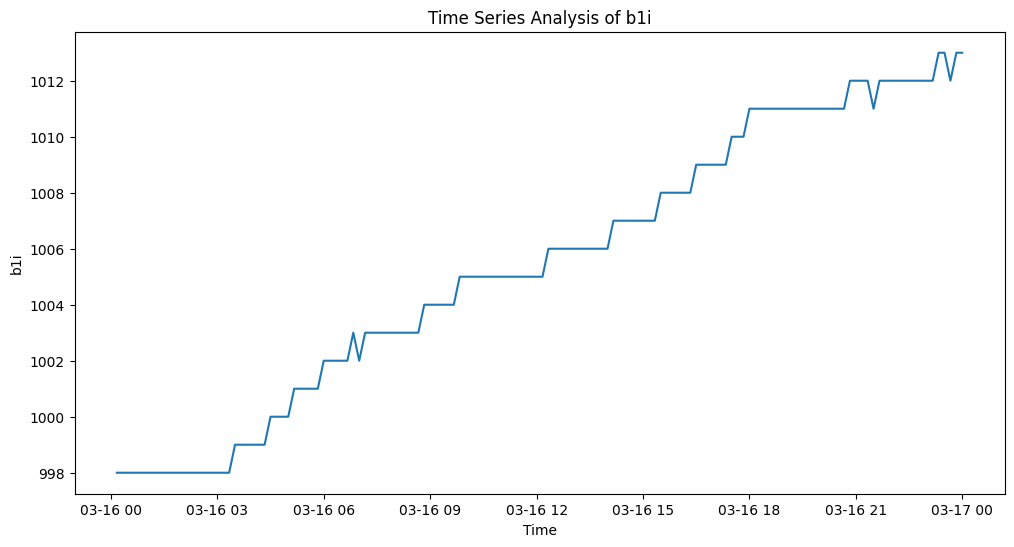

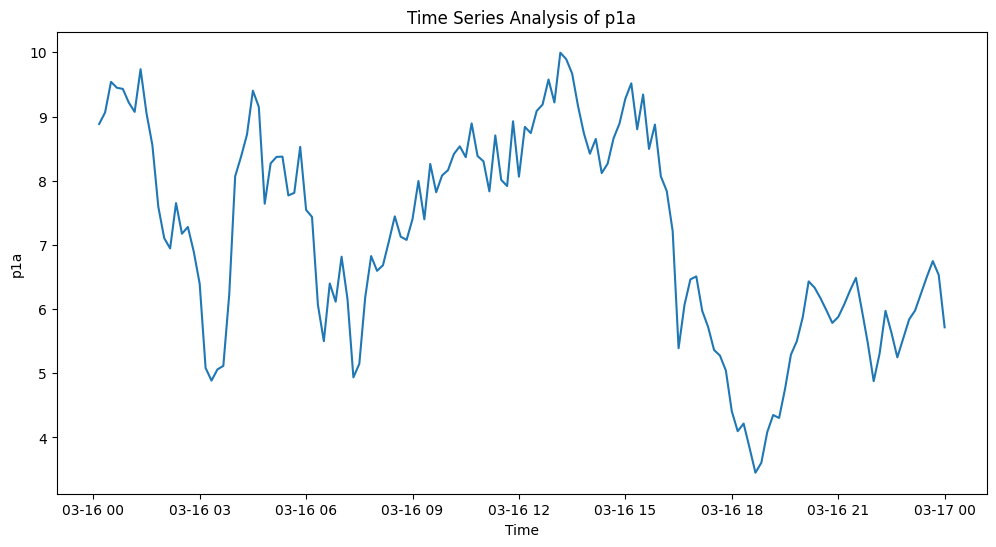

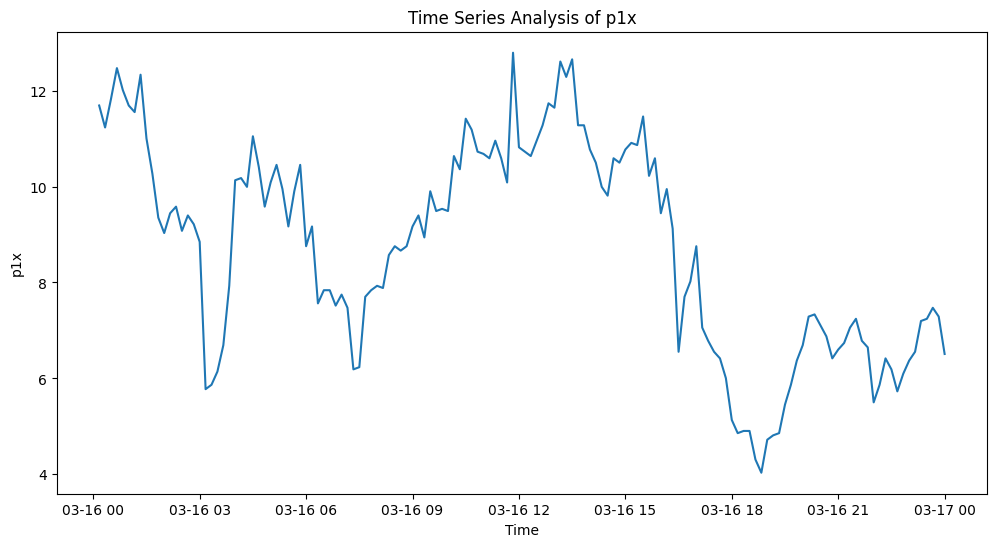

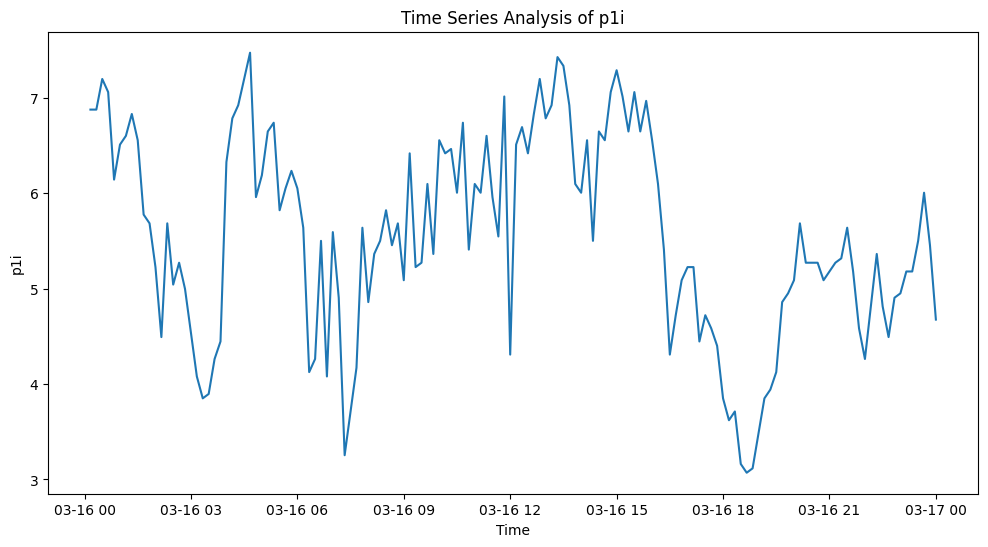

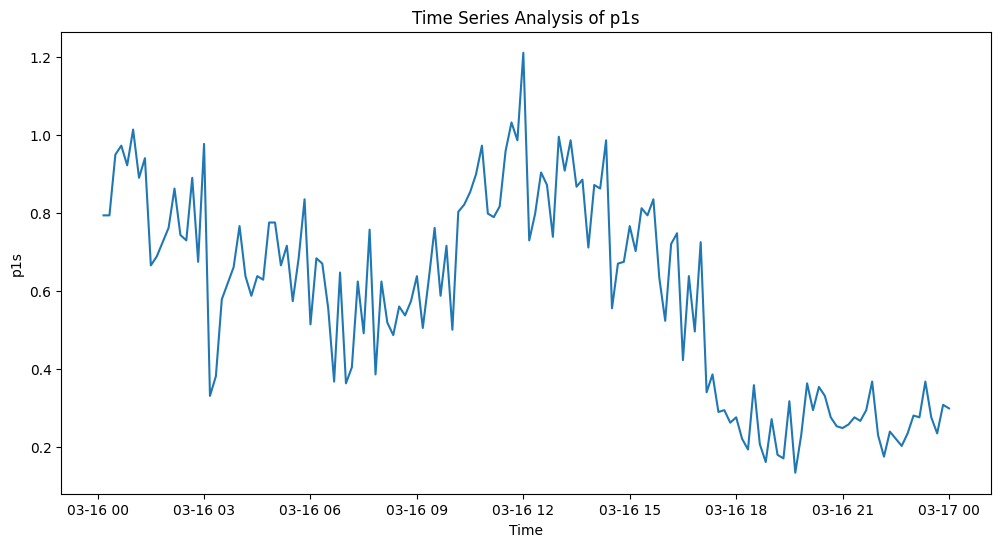

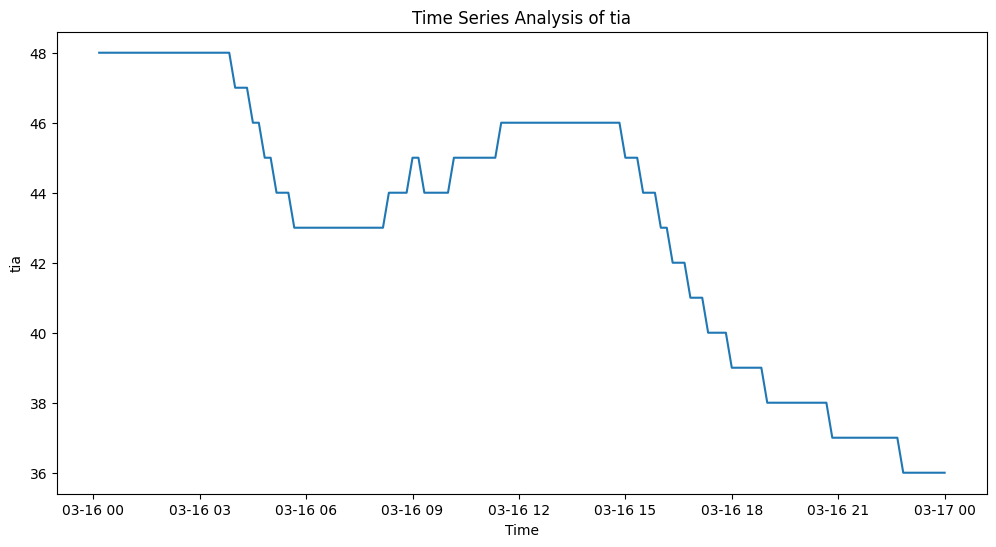

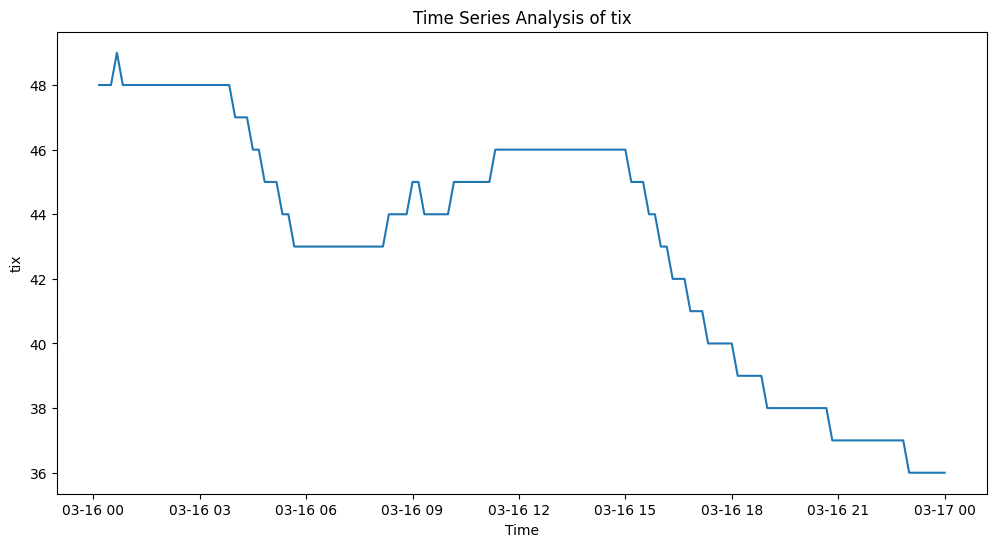

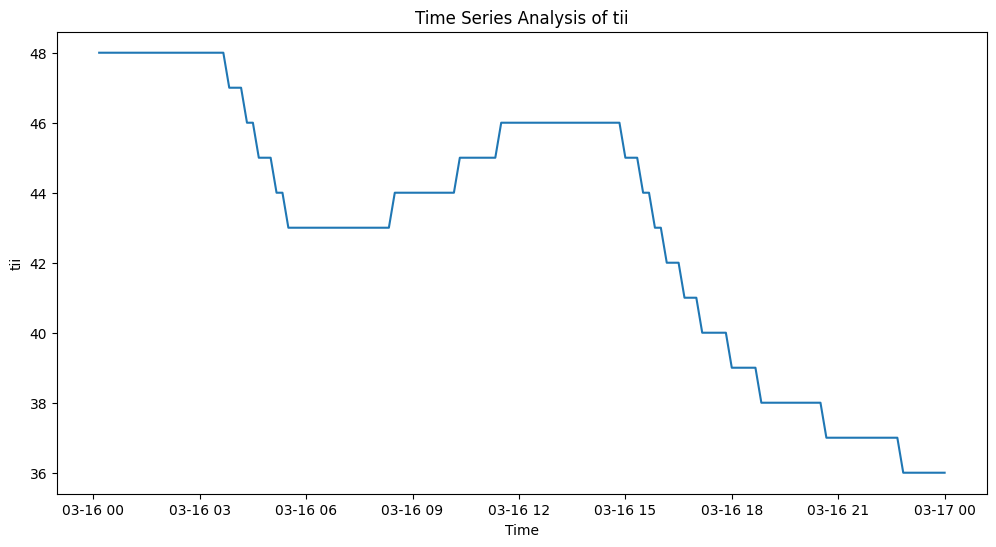

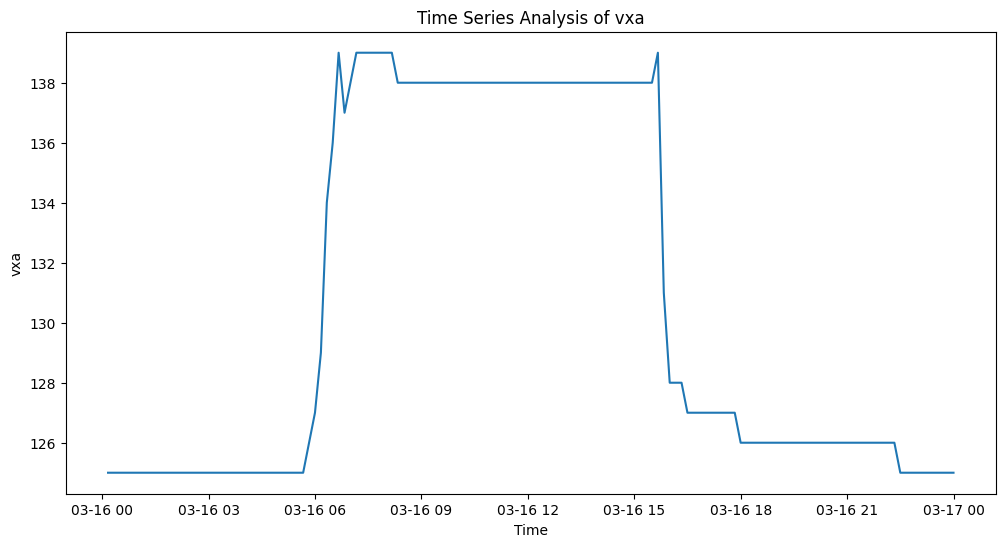

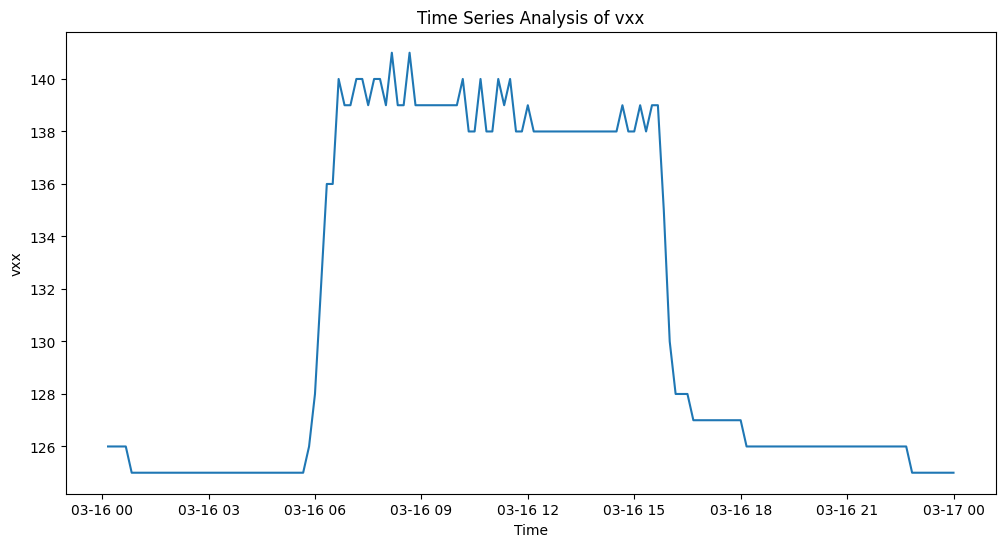

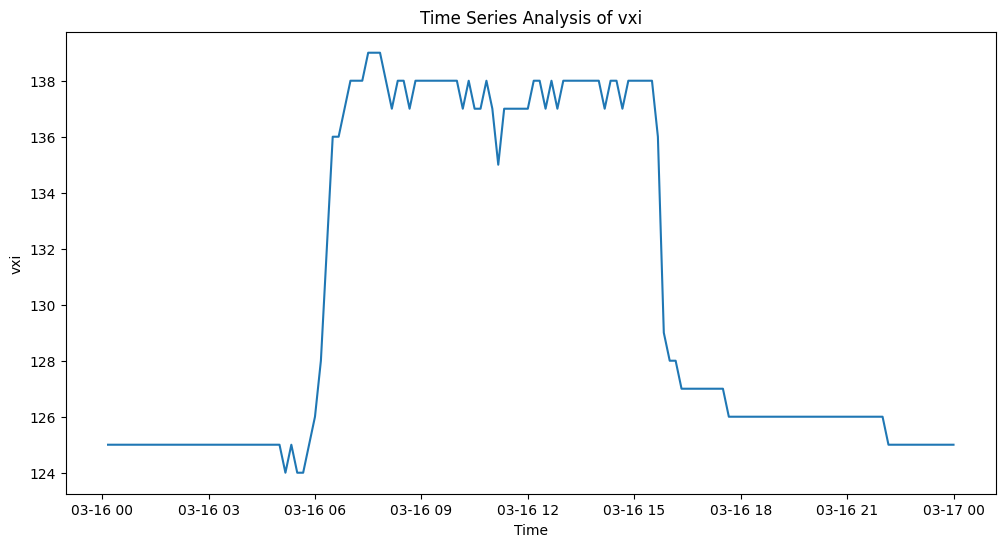

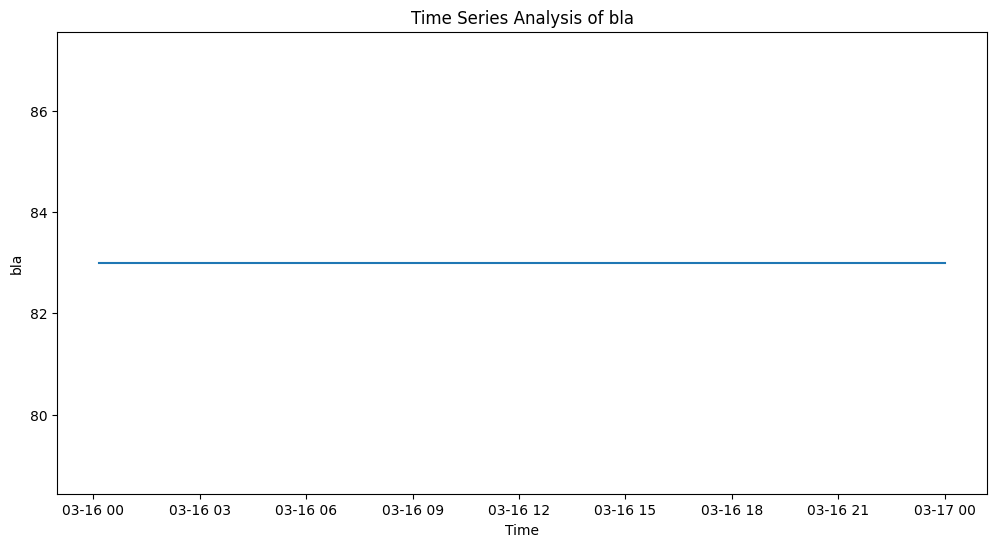

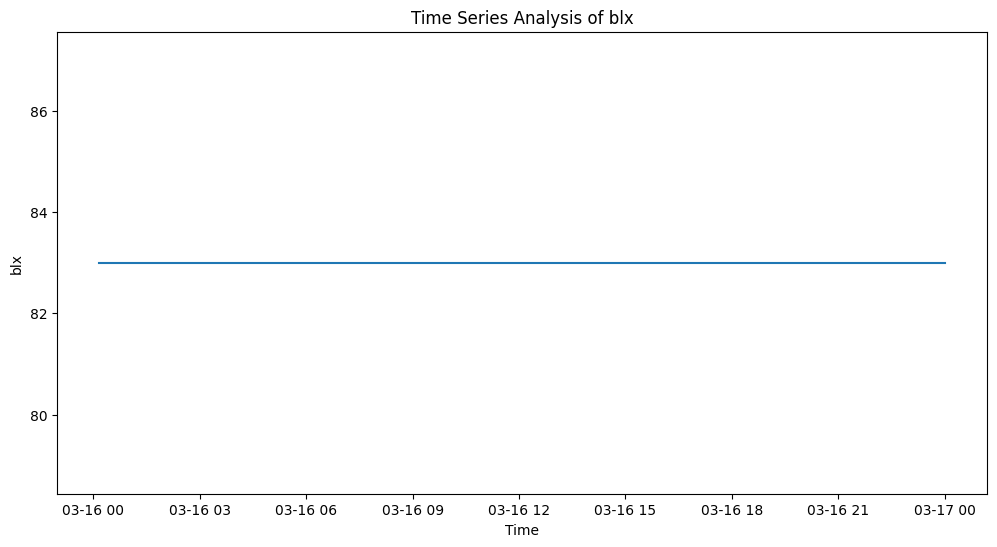

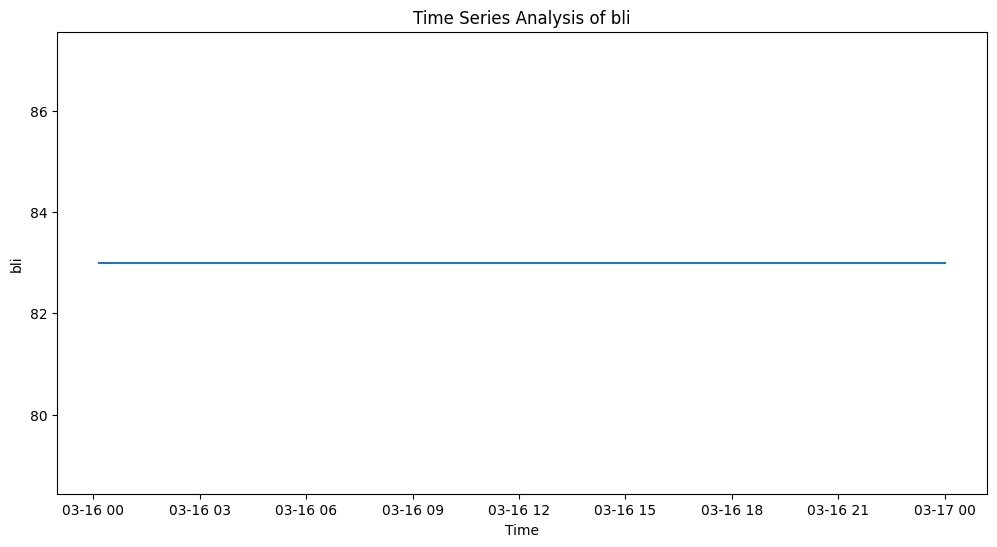

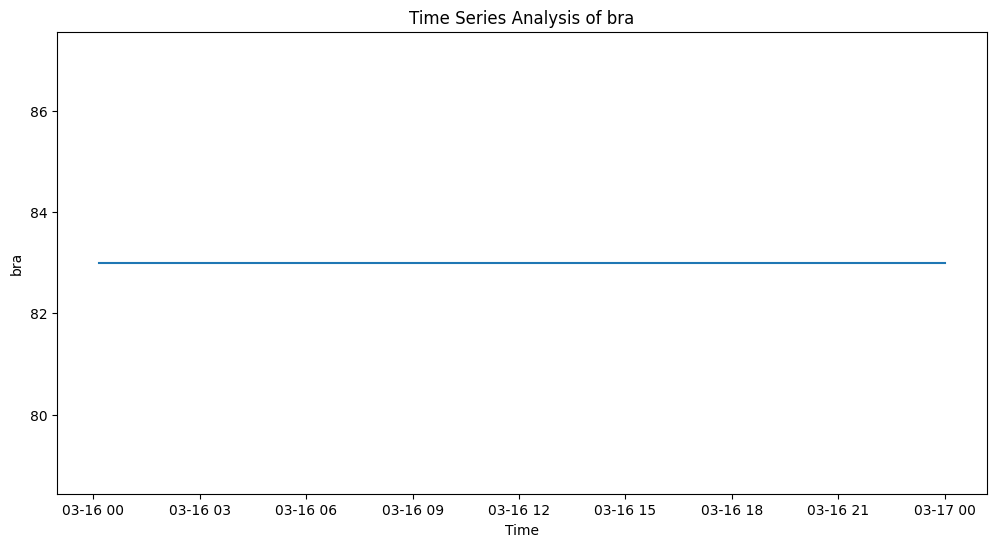

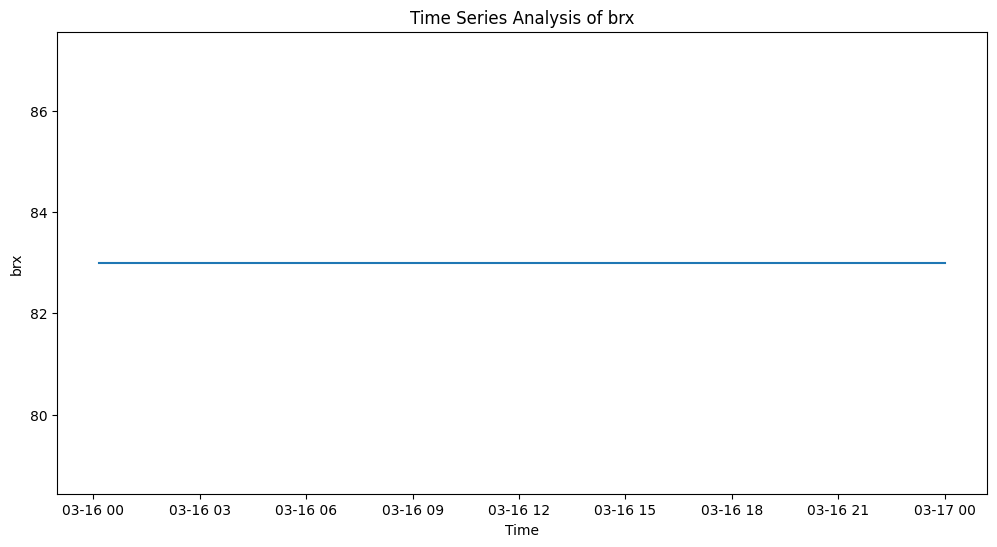

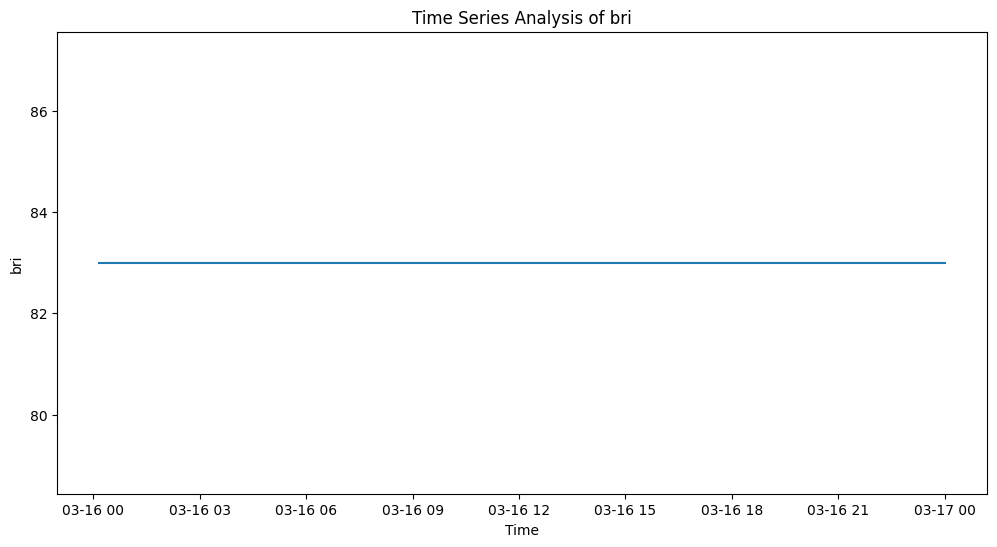

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [7]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

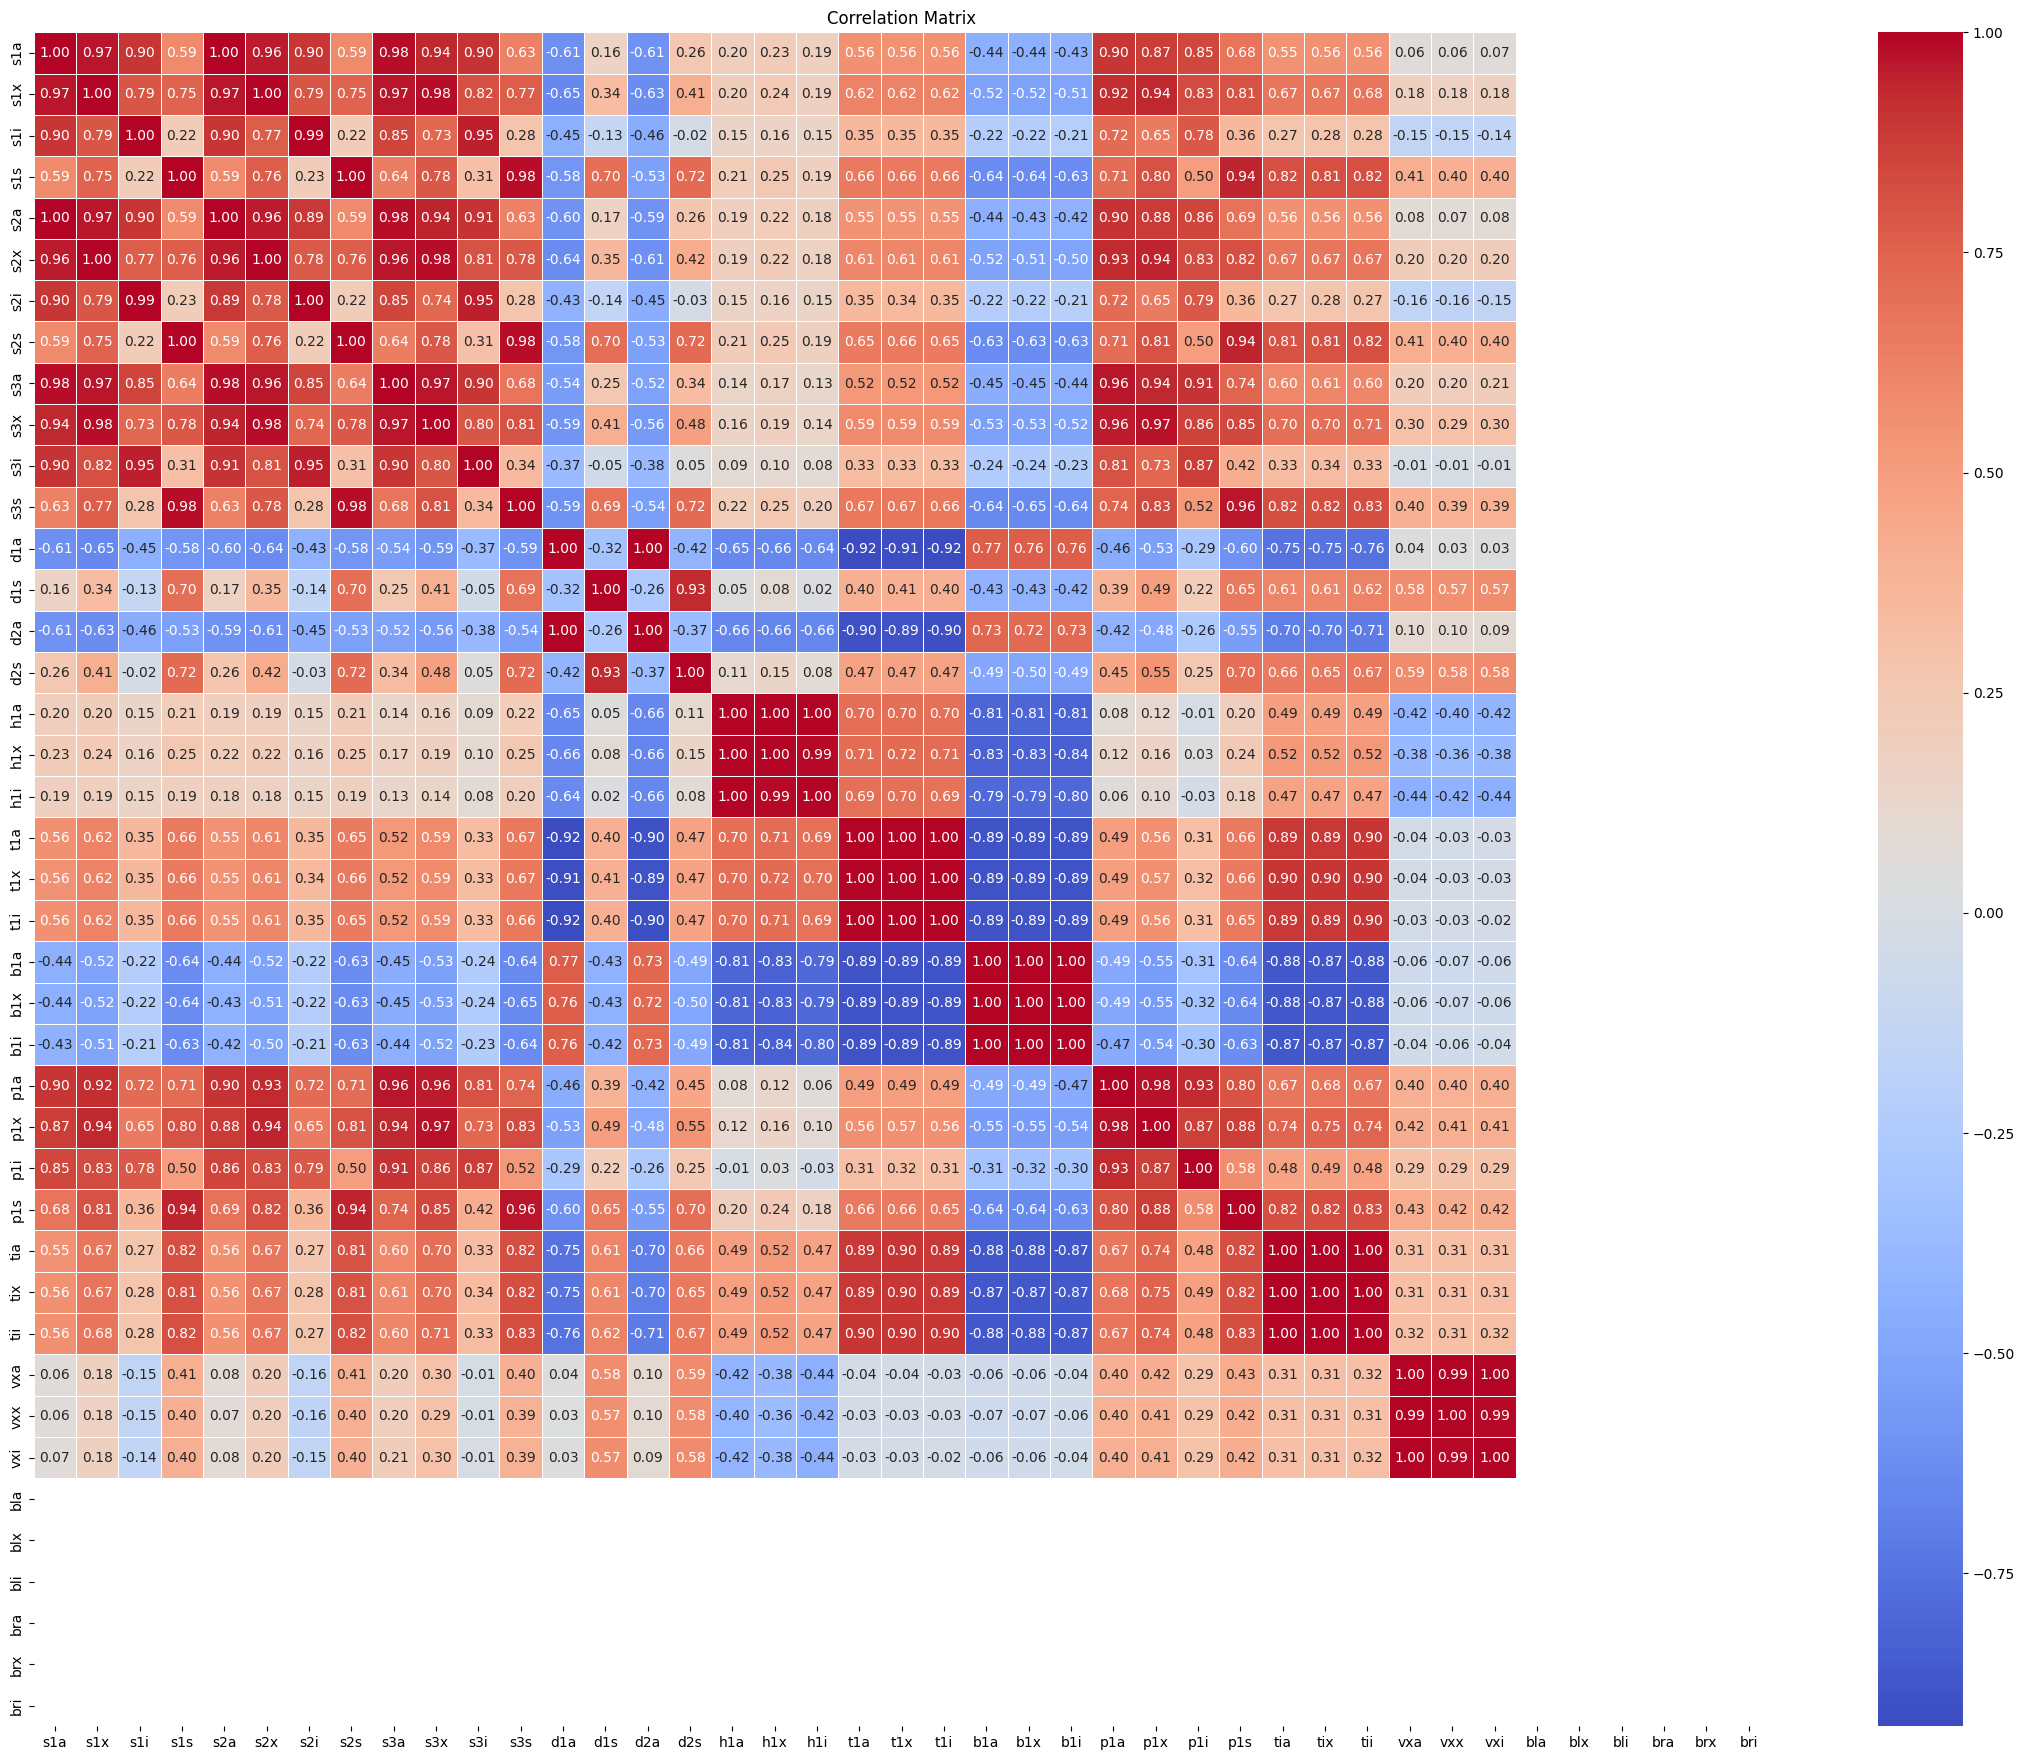

In [8]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

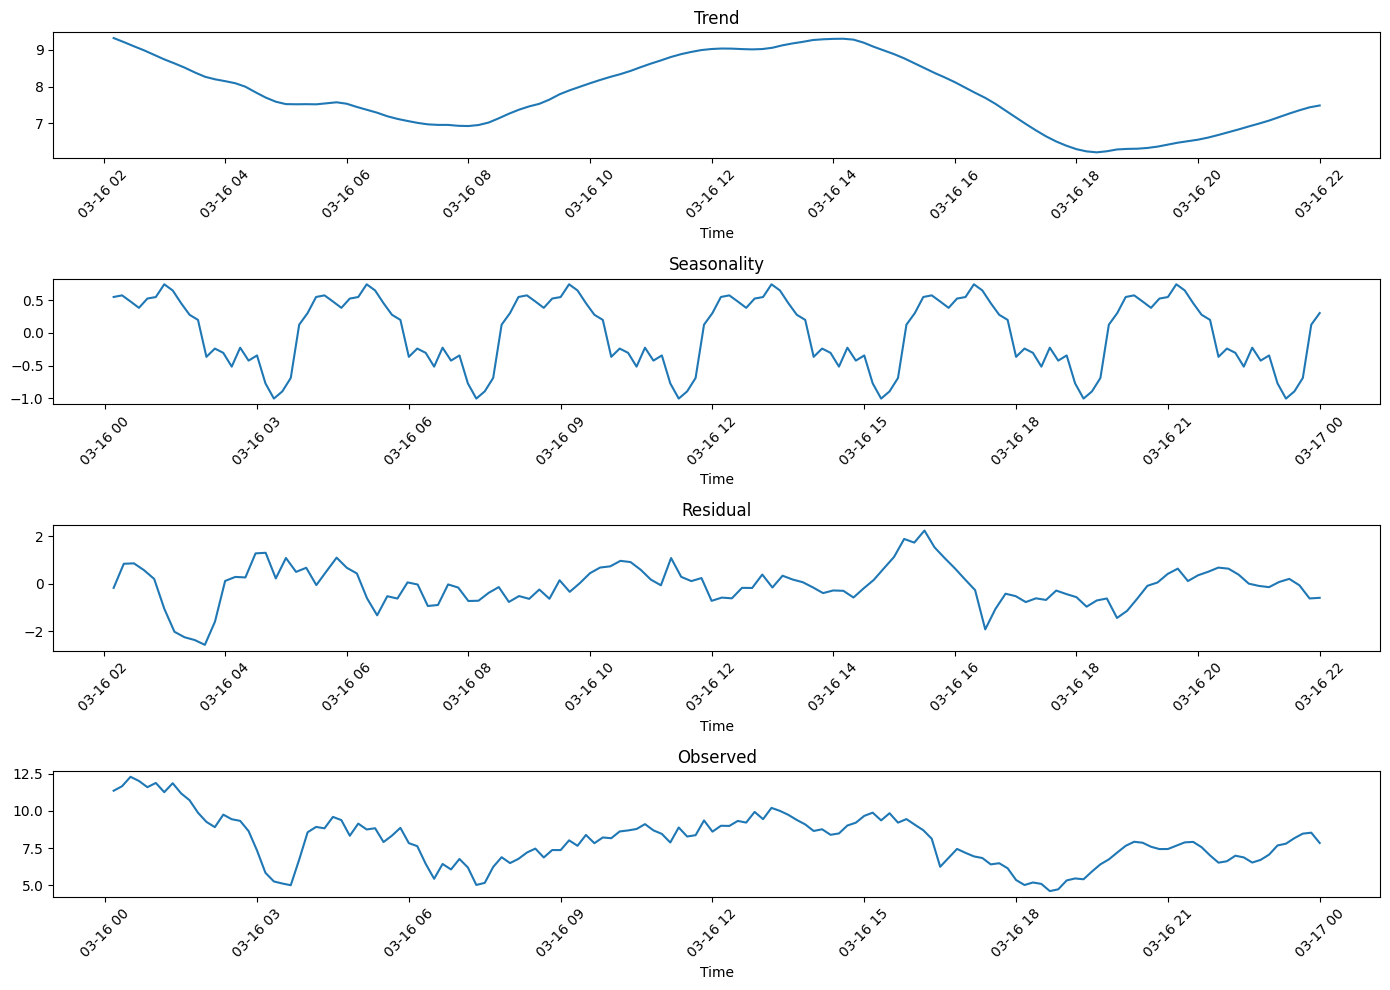

In [9]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


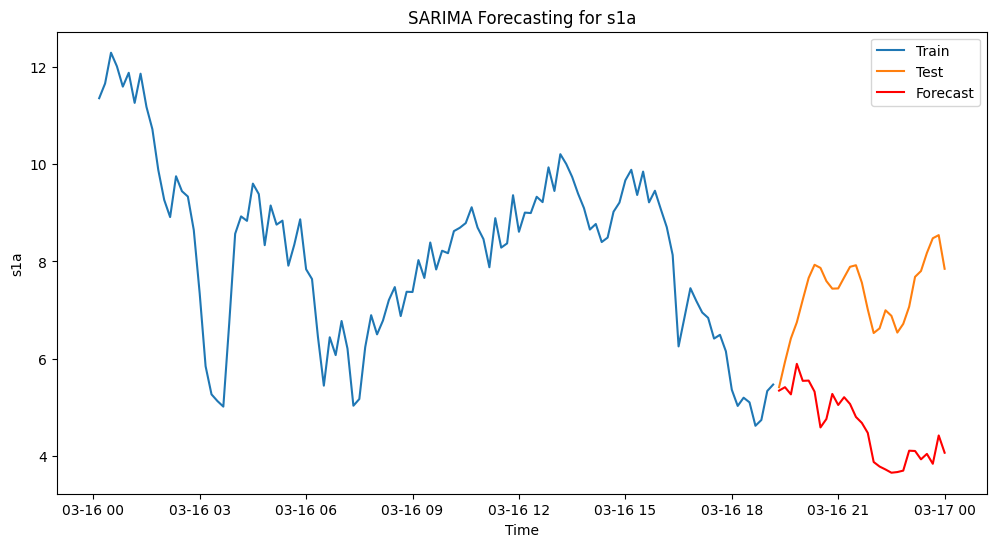

In [10]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()